# ****important libraries****

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler,PowerTransformer,FunctionTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

## Loading Data

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Basic understanding or simple question to know about data

In [5]:
# 1.How big is the data?
train_df.shape

(1460, 81)

In [6]:
# 2.How does the data look like ?
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# 3.What is data type of columns ?
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
## numeric and categorical columns

num_cols = train_df.select_dtypes(include=('int64','float64')).columns
cat_cols = train_df.select_dtypes(include='object').columns

print(num_cols)
print(cat_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

#### Ploting numerical columns with respect to salePrice to check their relation

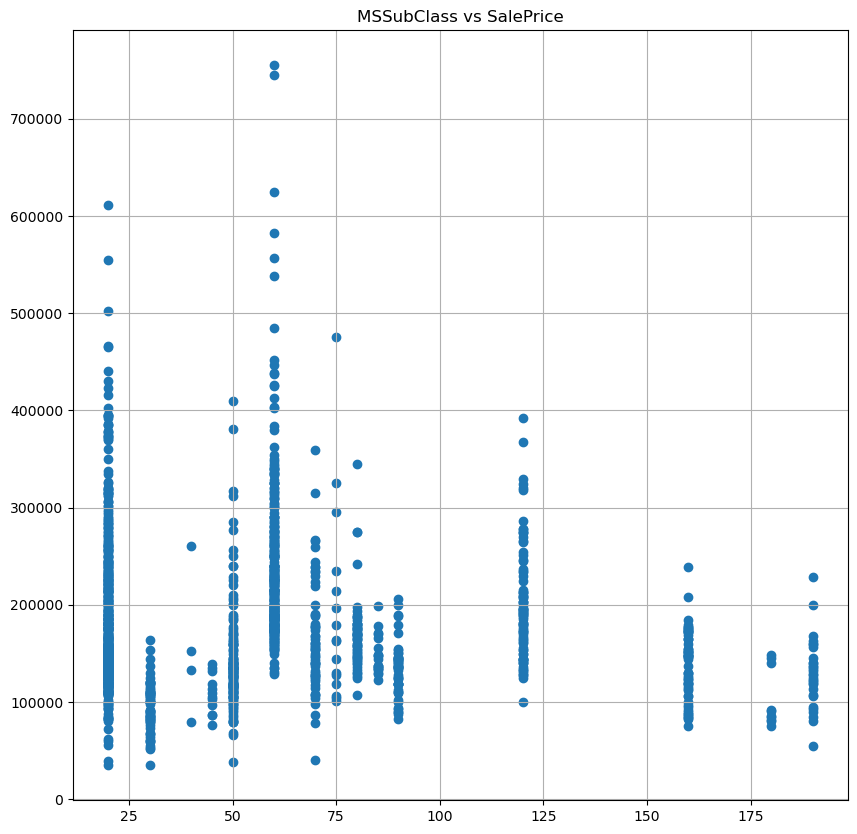

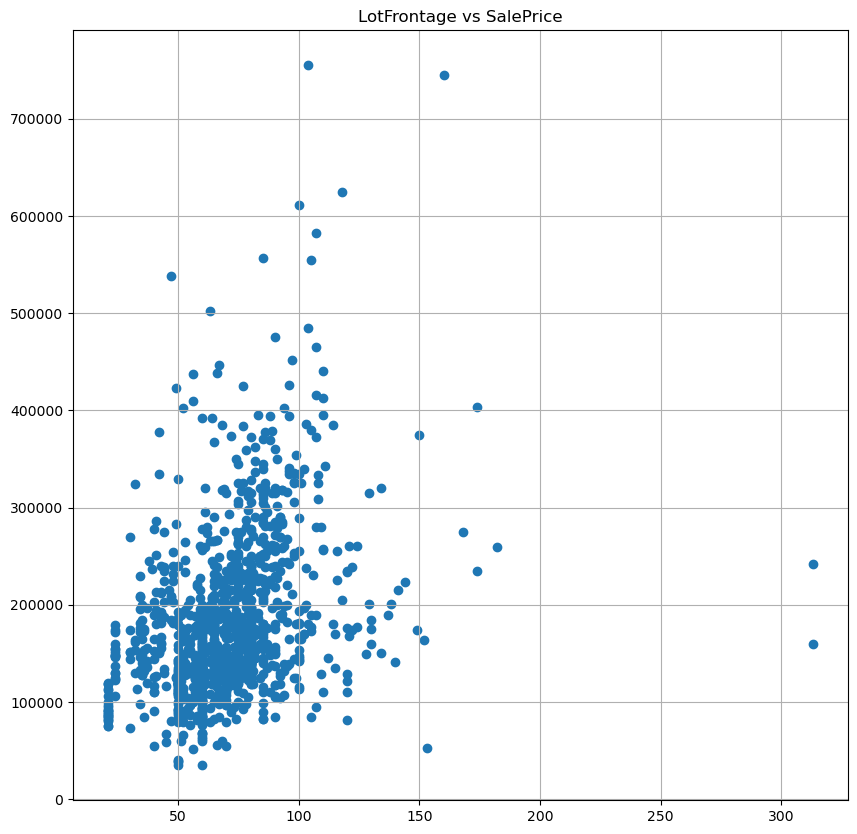

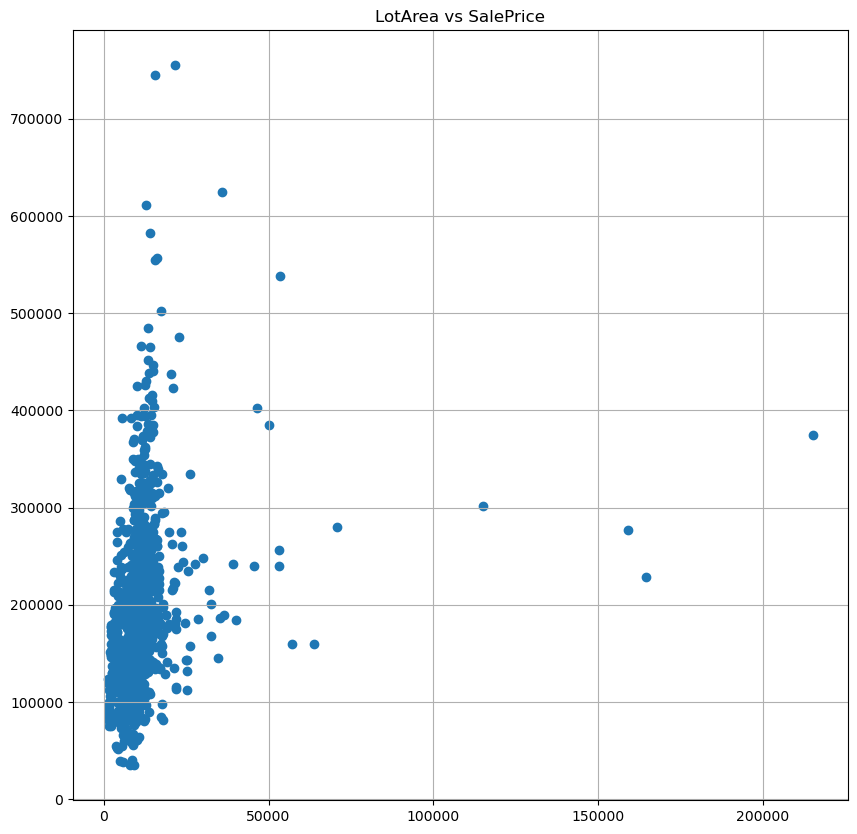

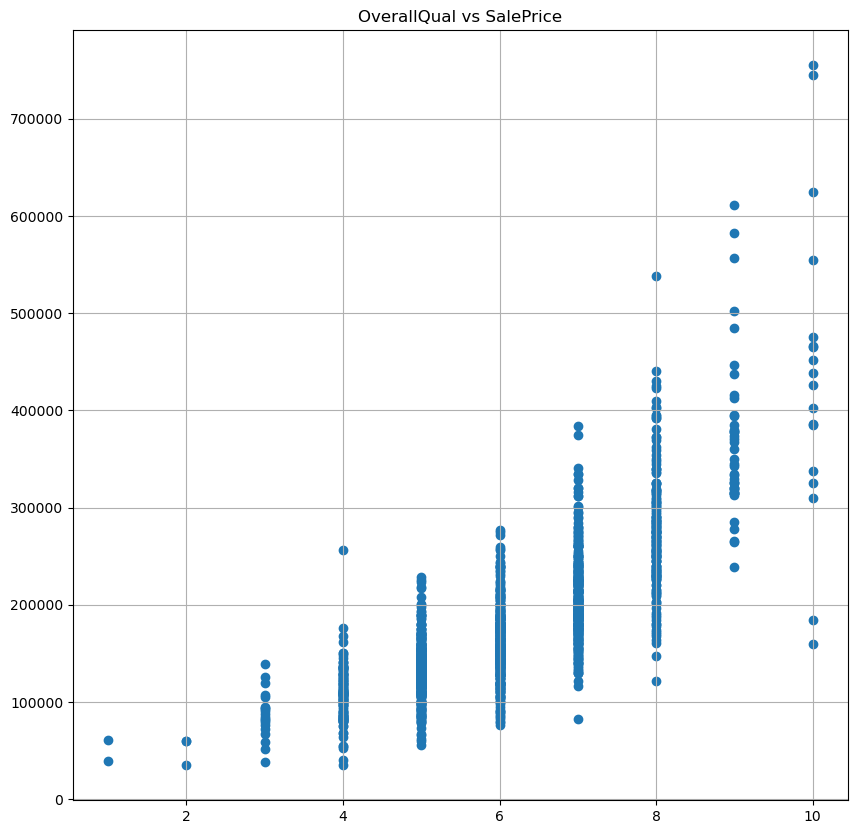

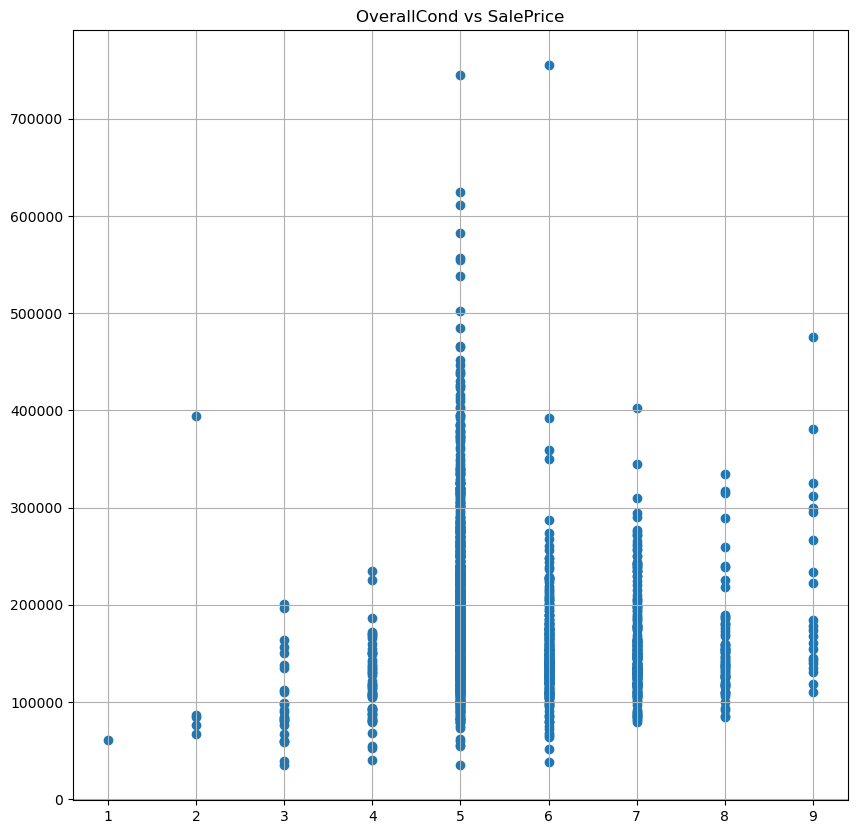

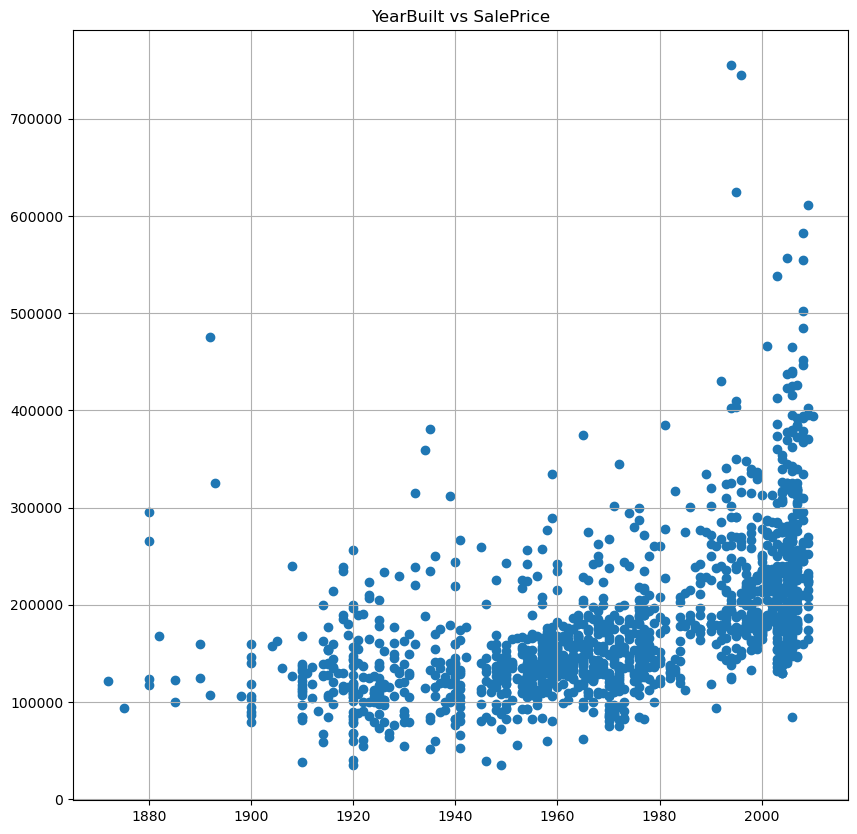

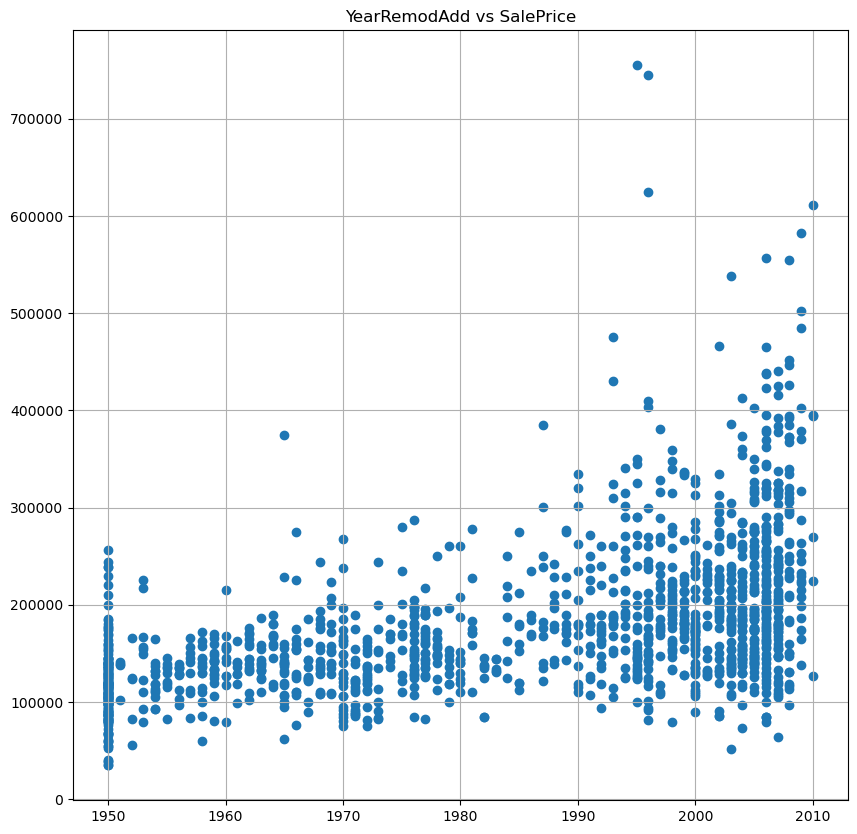

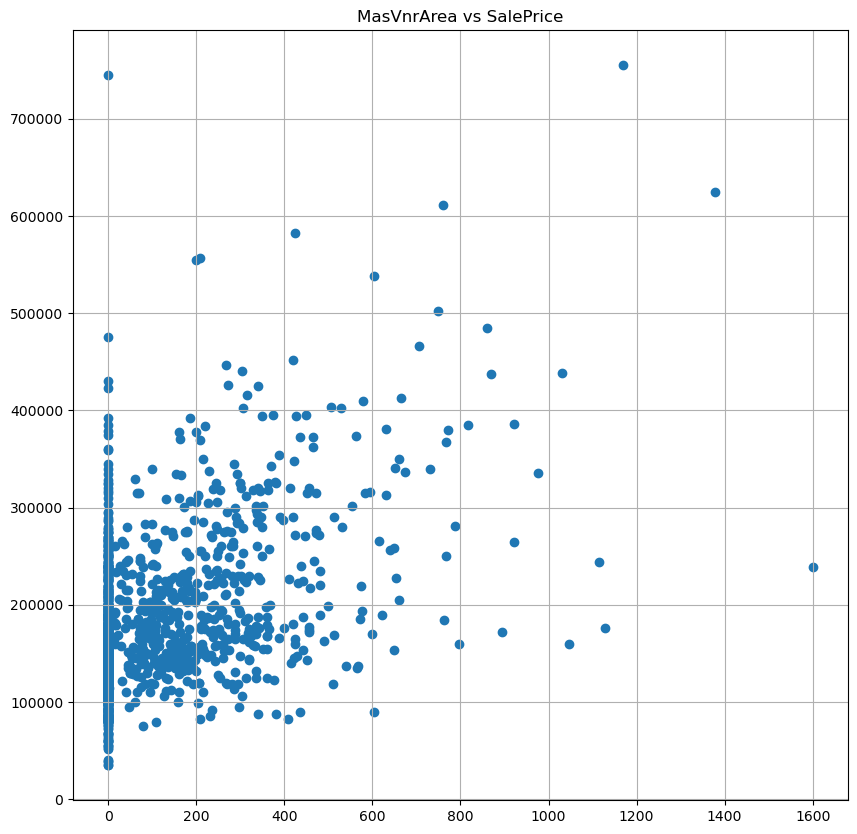

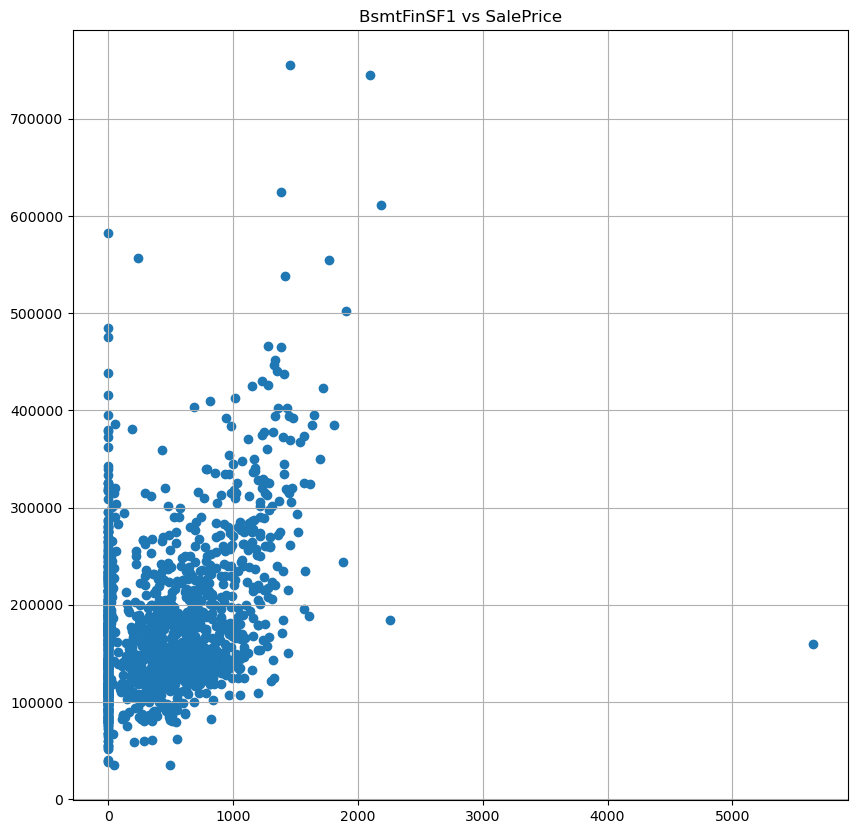

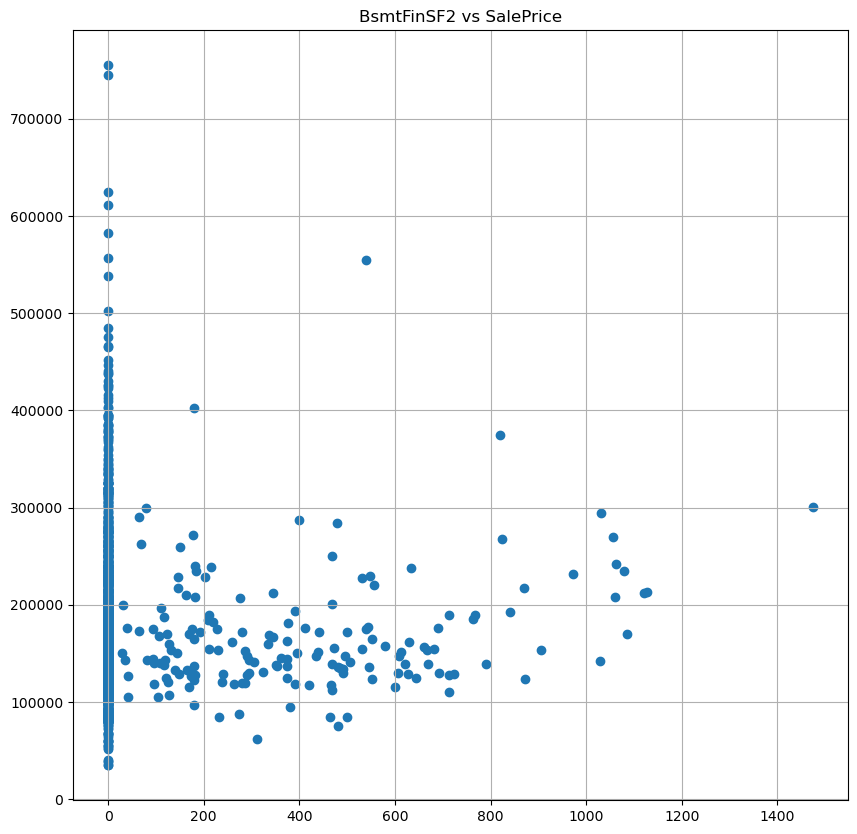

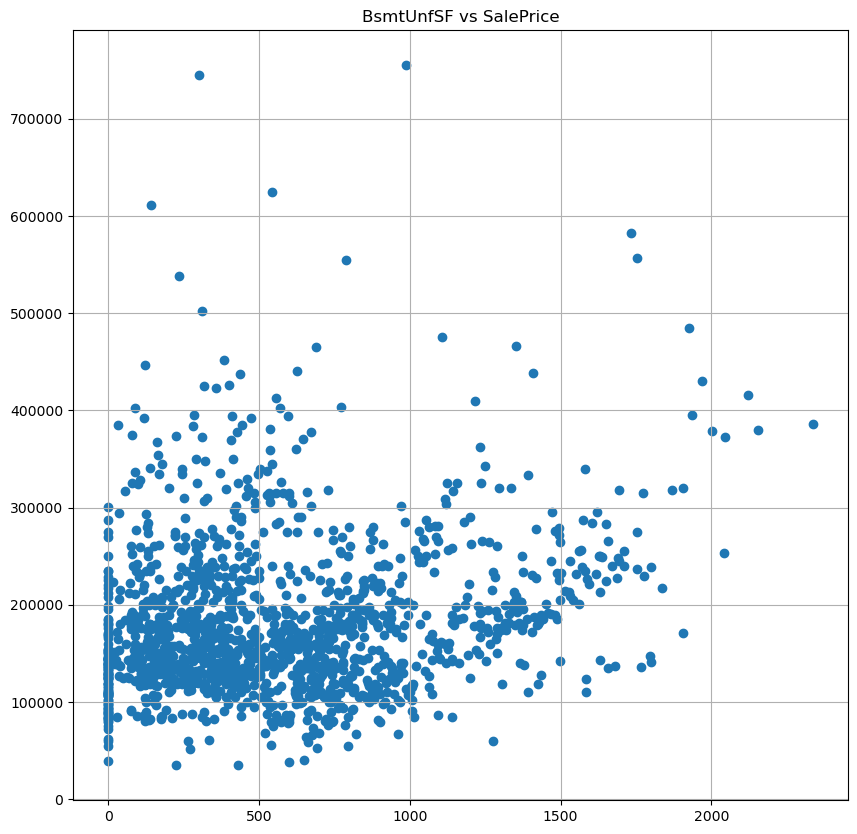

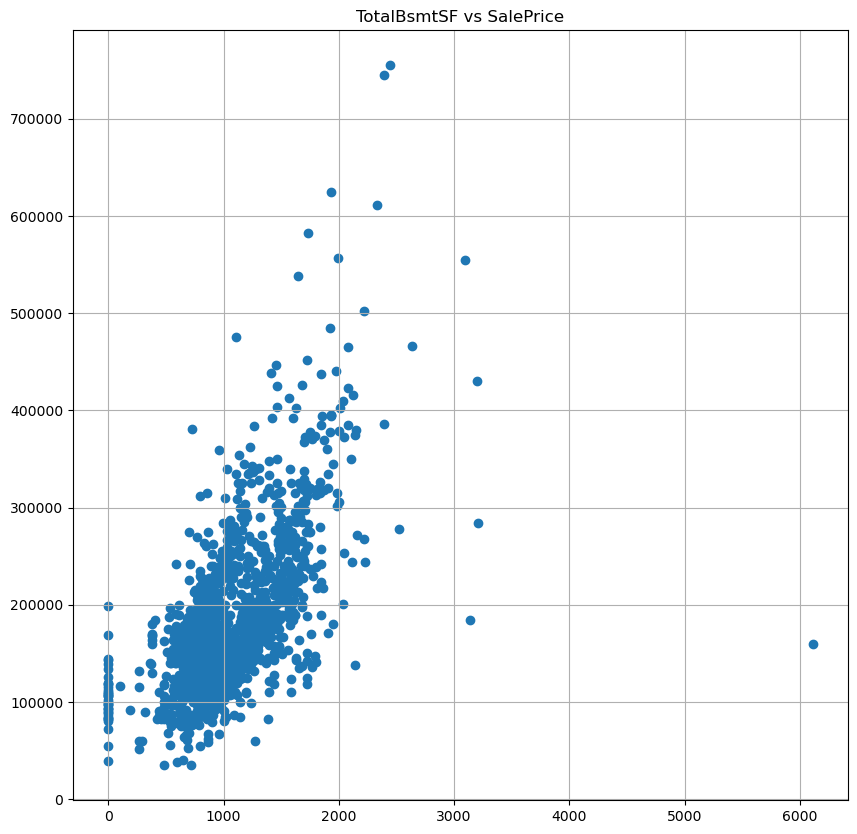

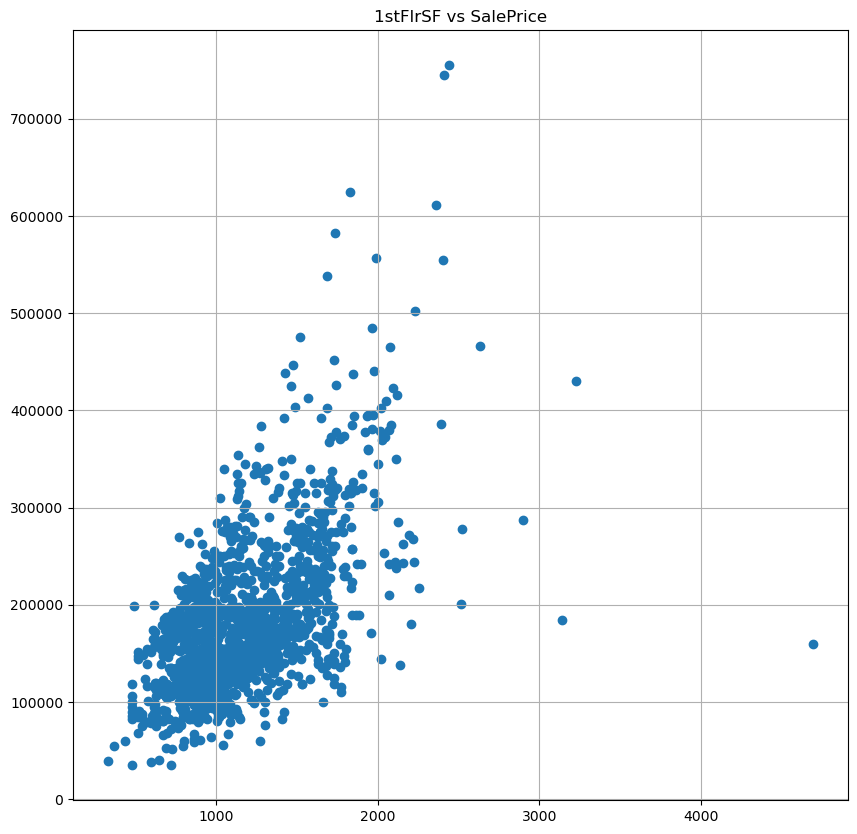

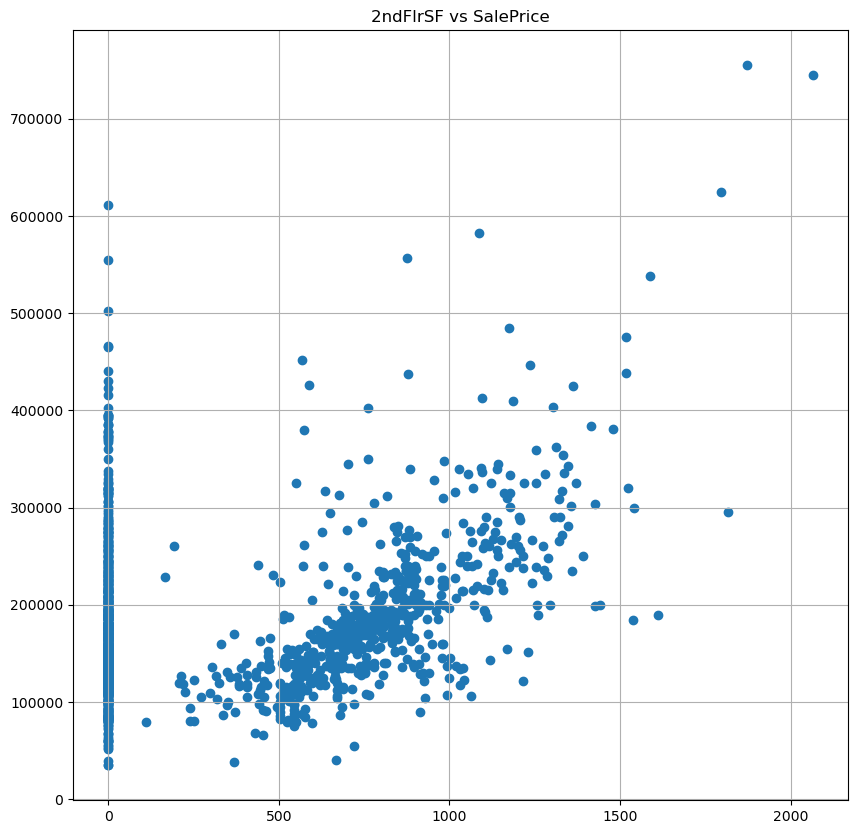

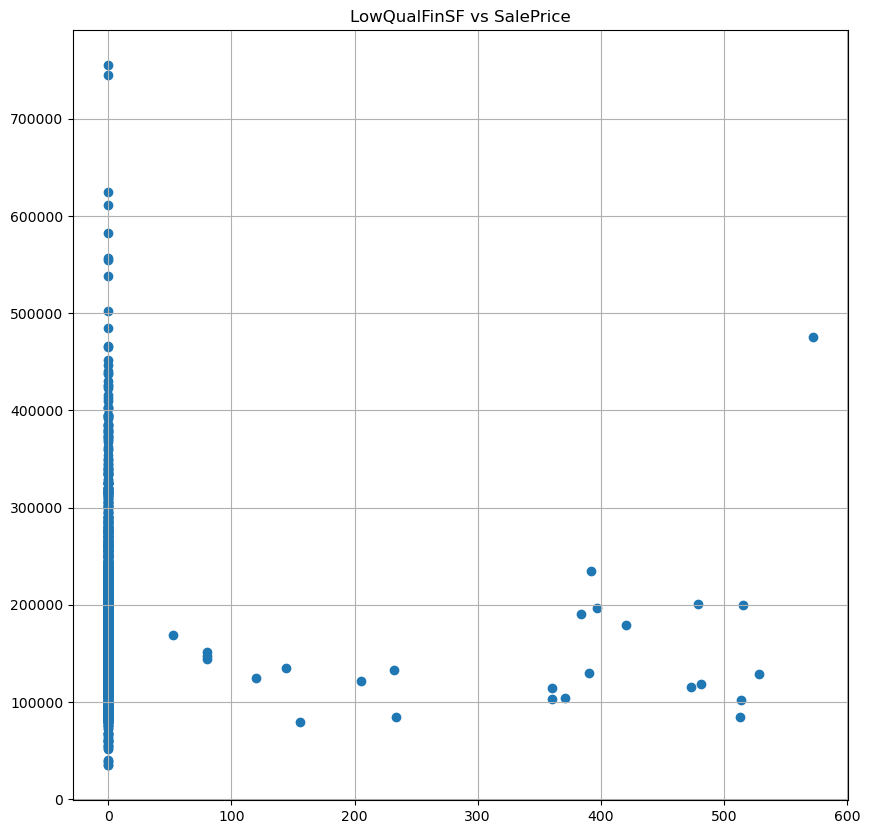

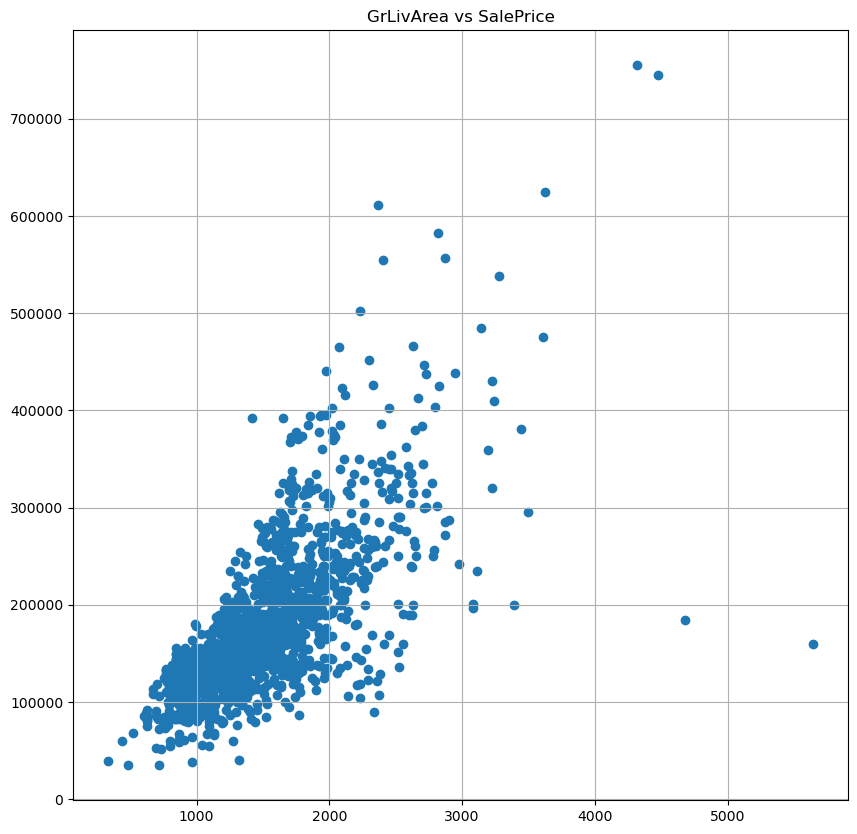

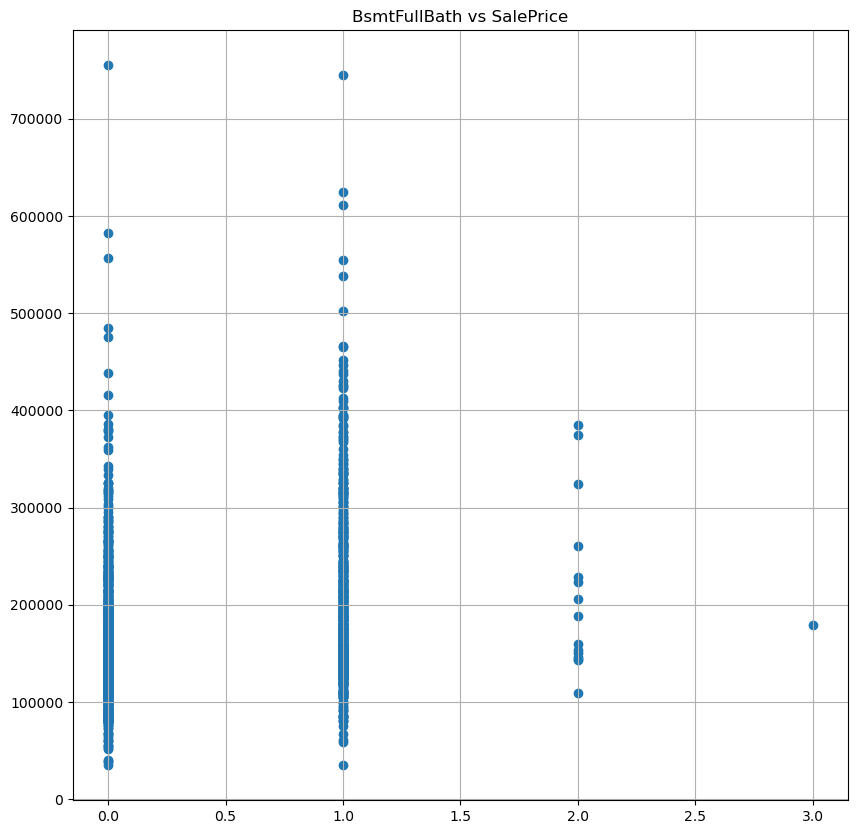

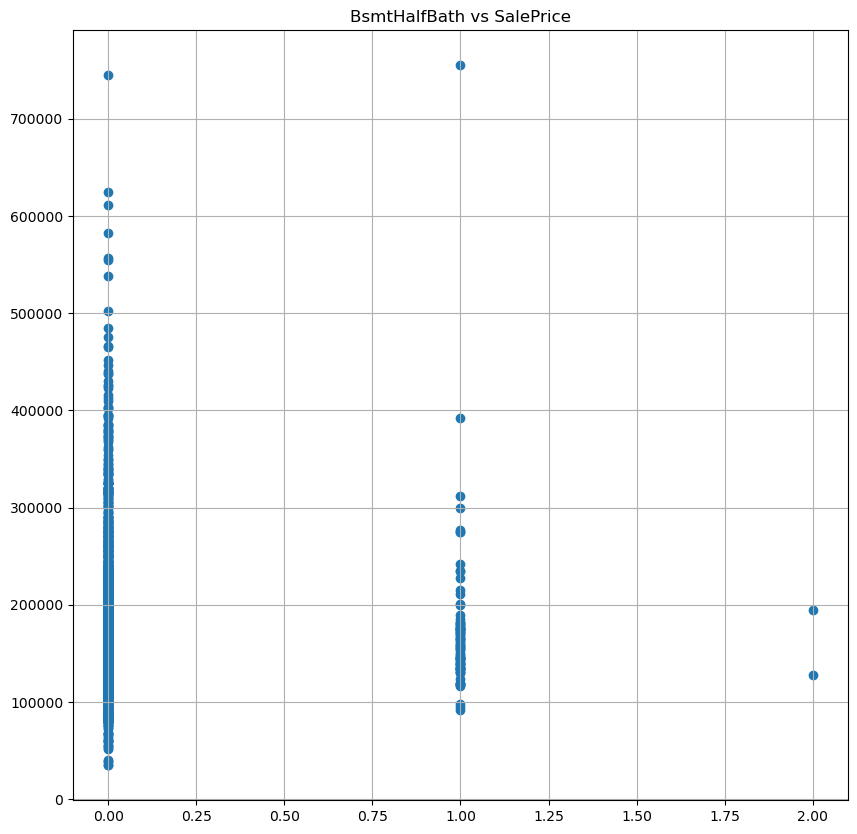

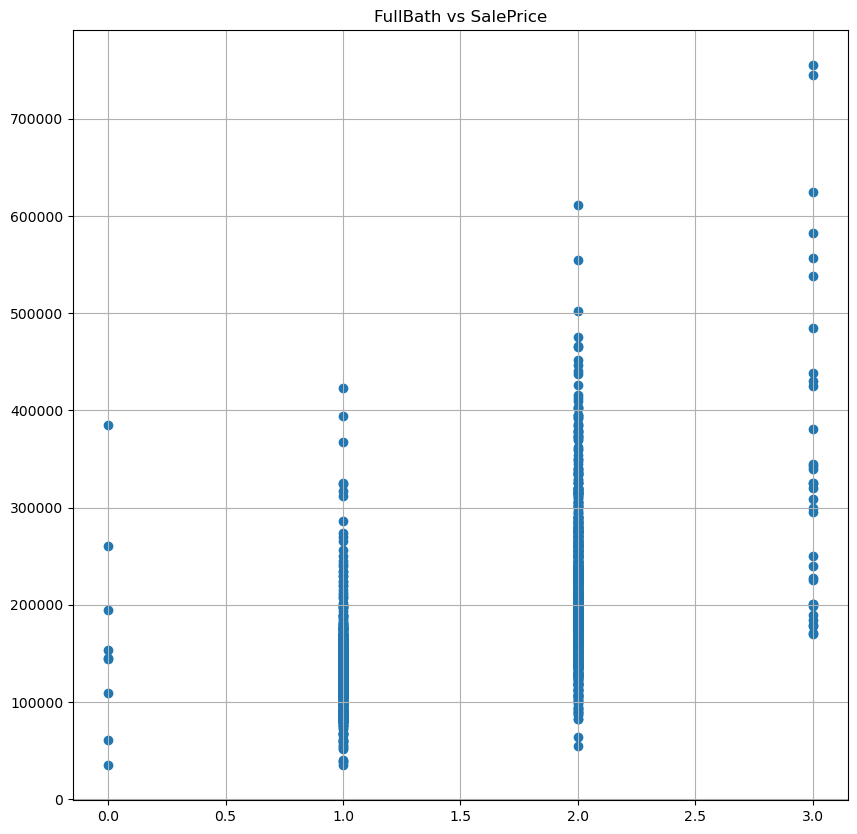

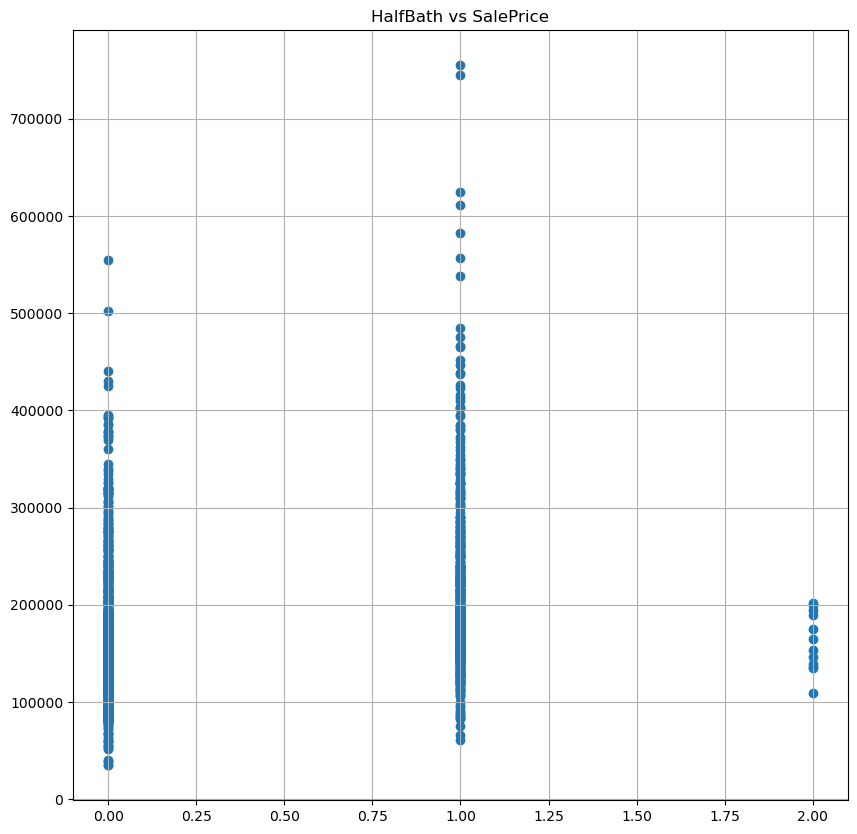

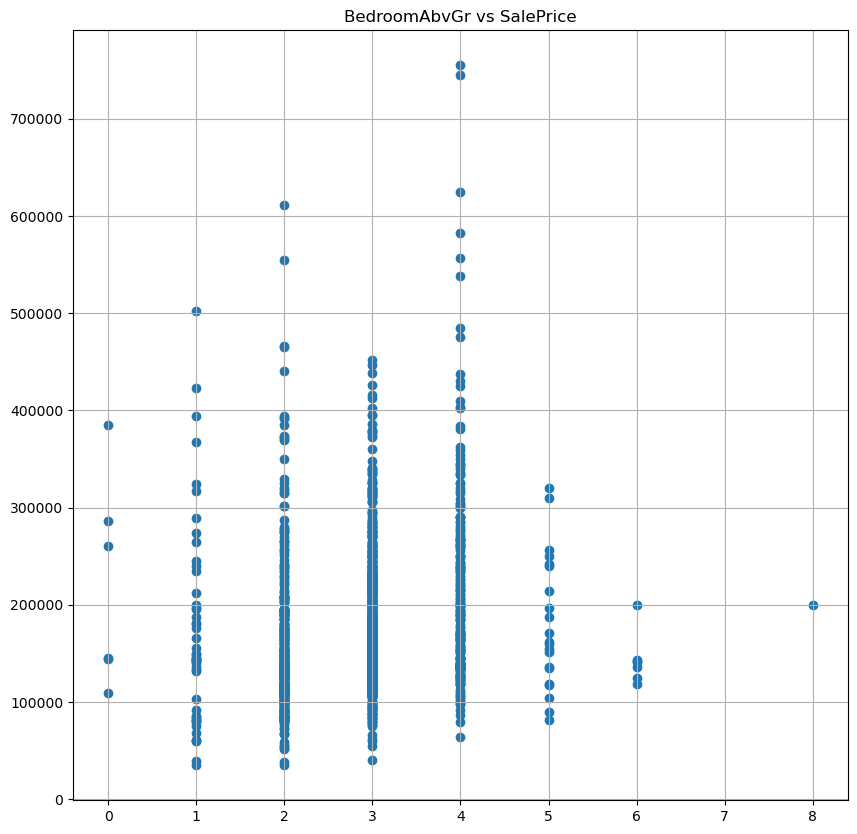

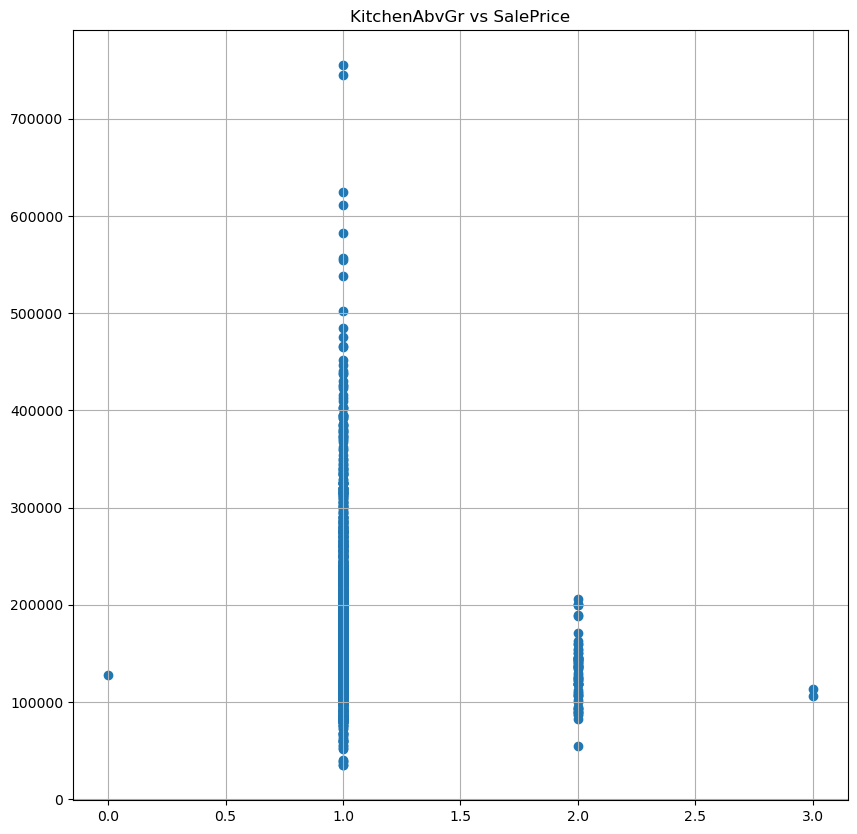

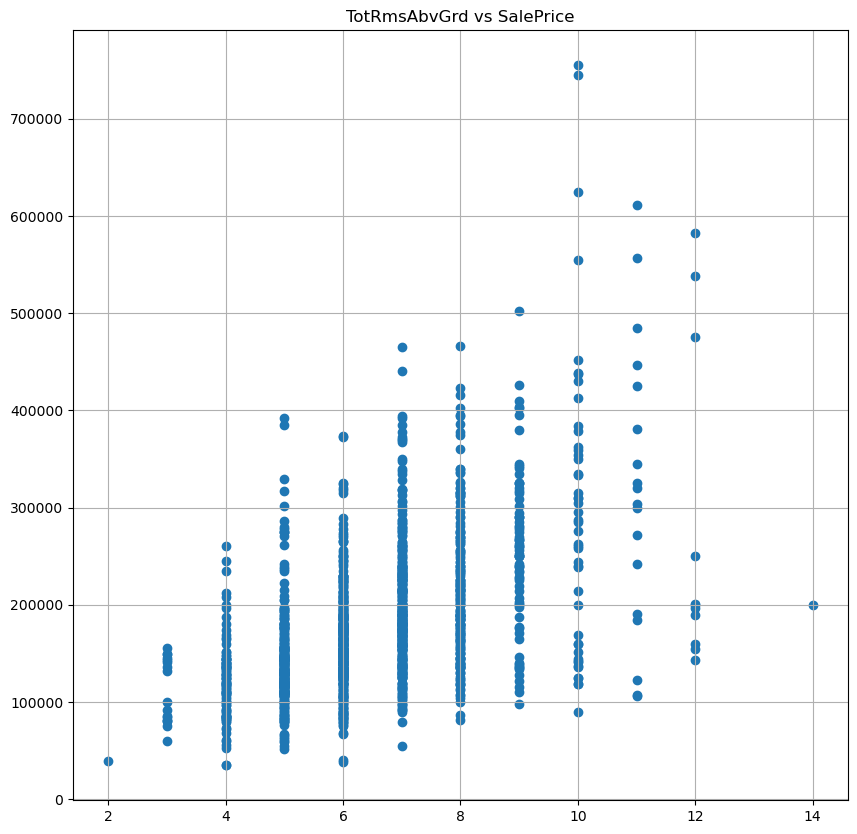

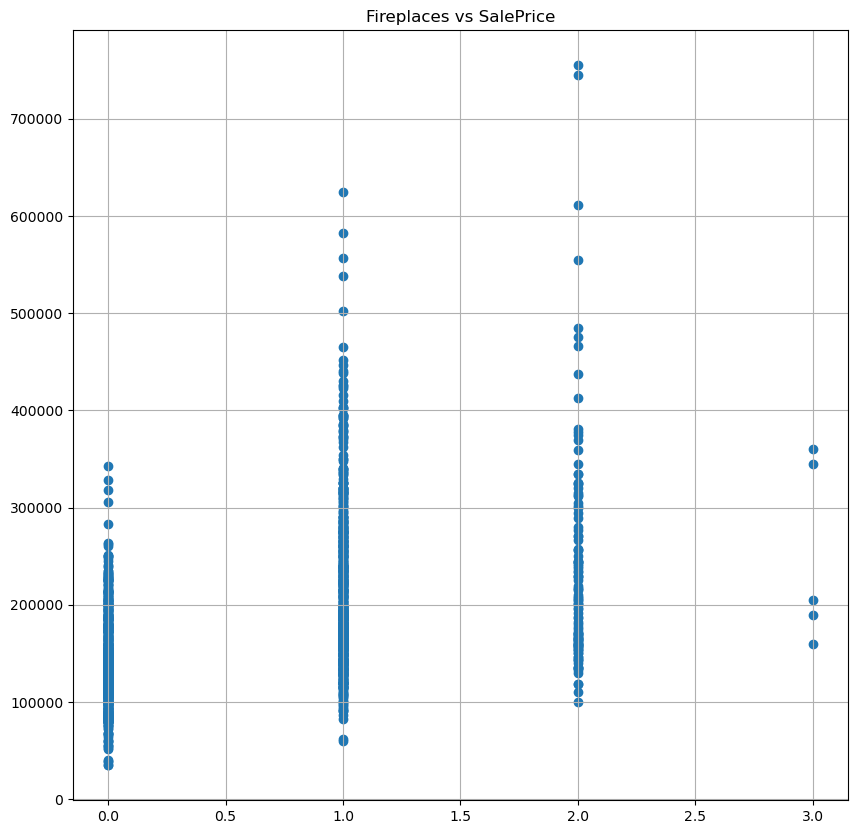

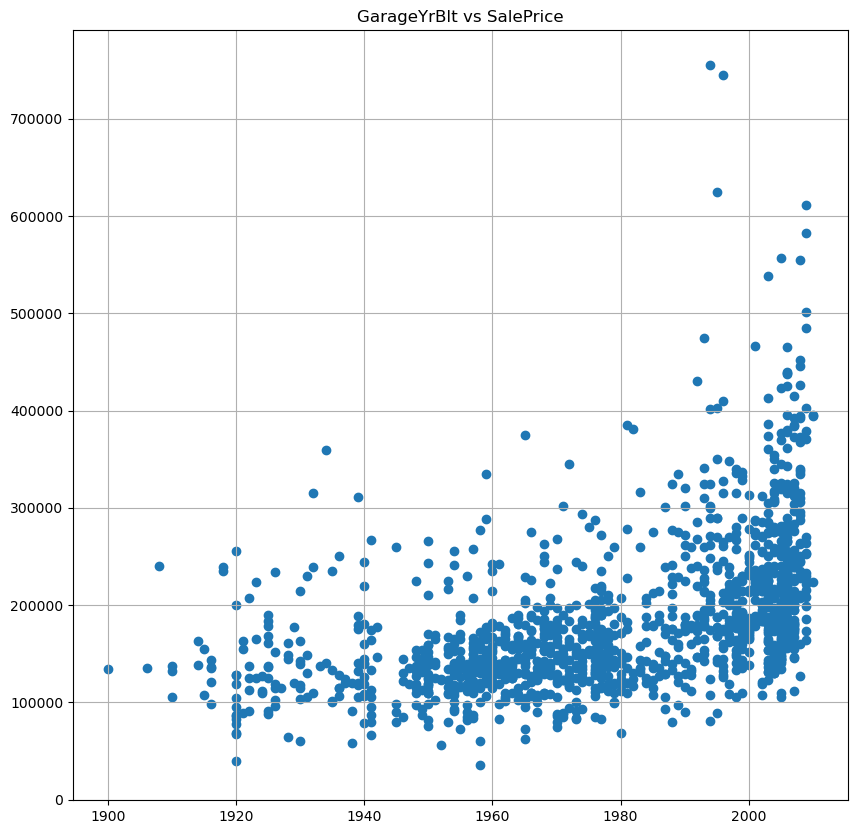

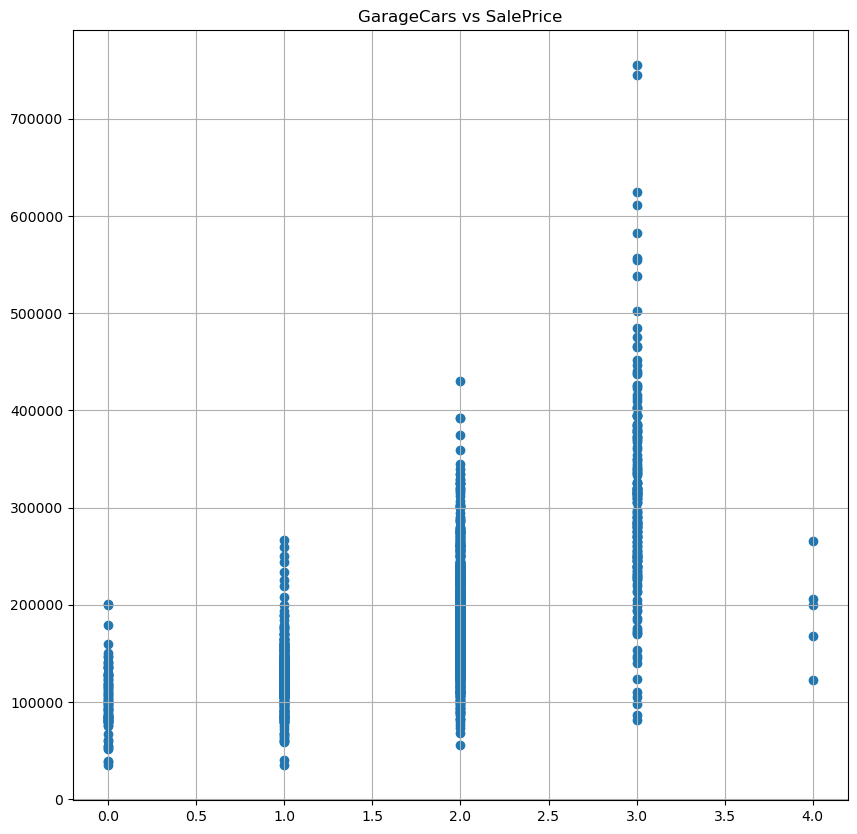

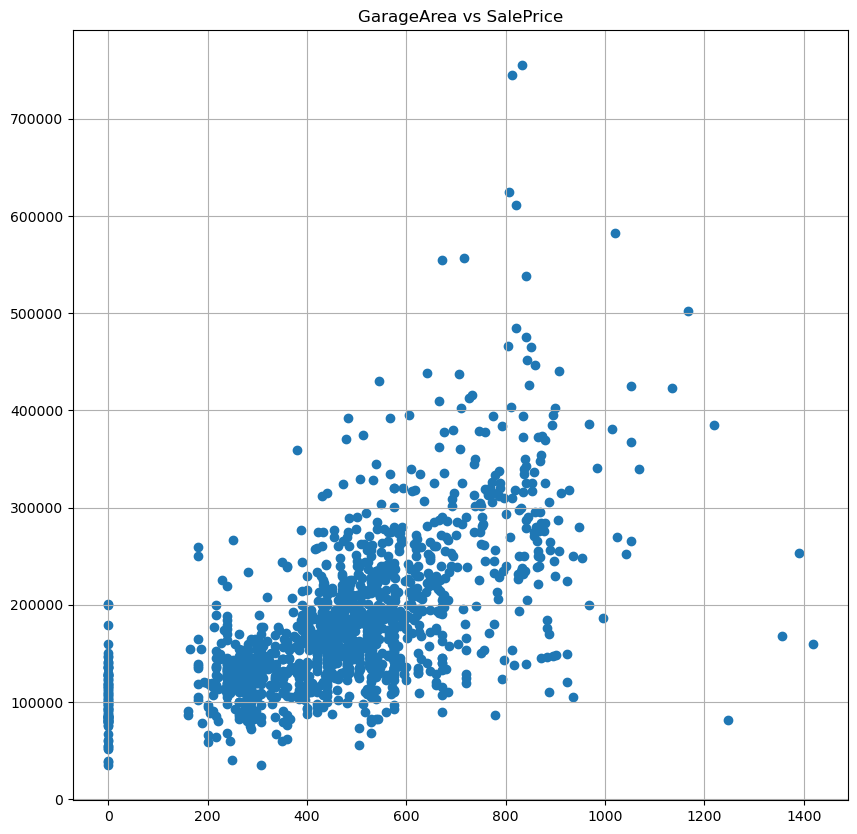

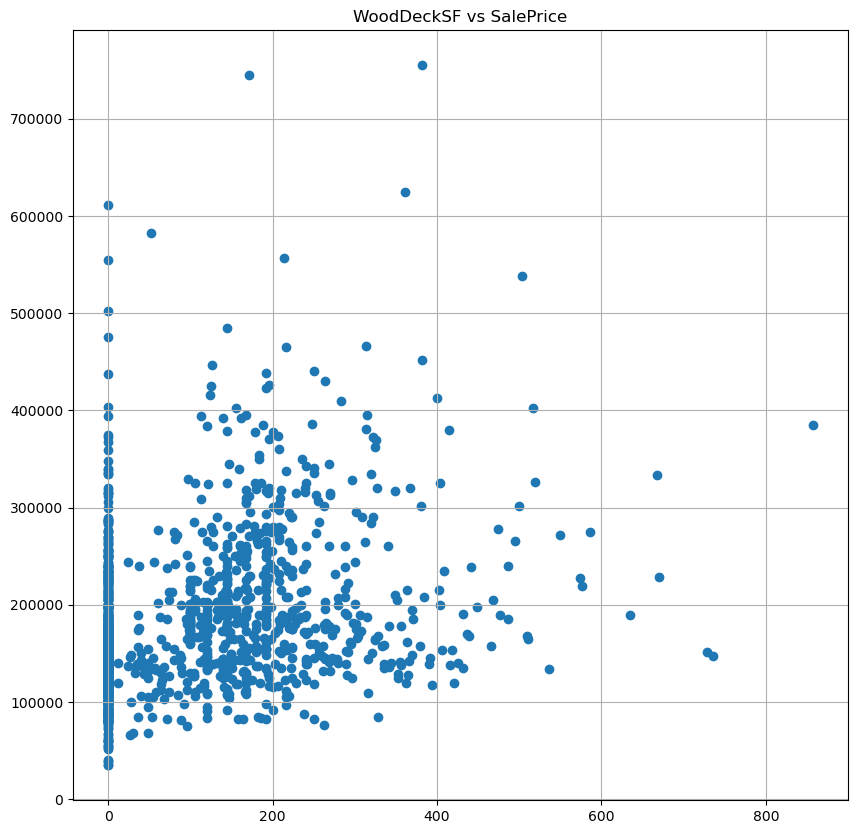

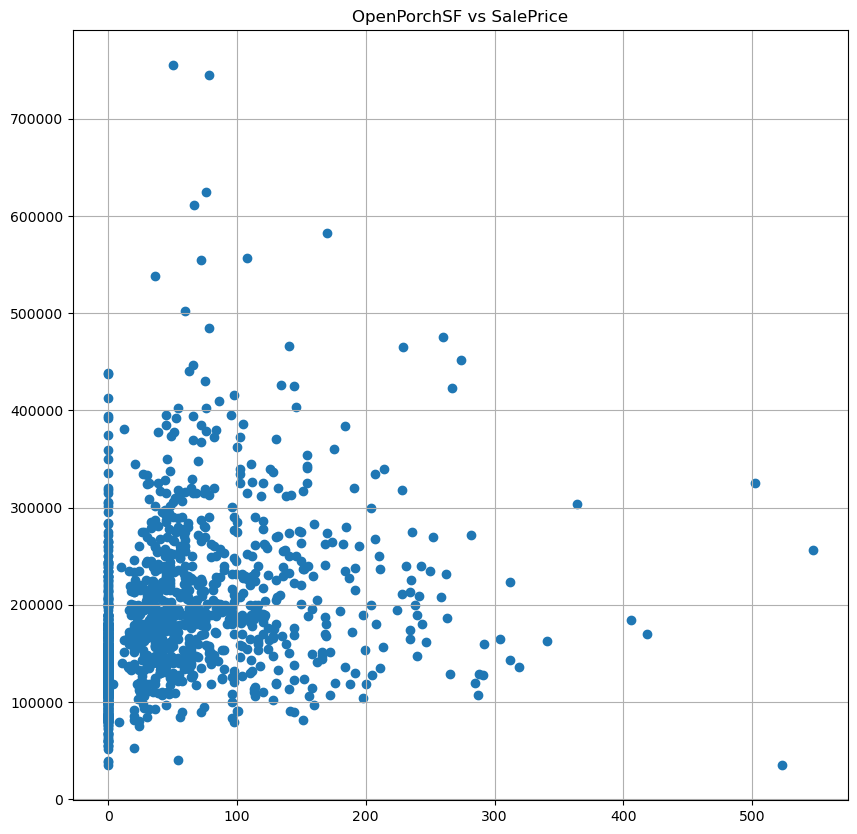

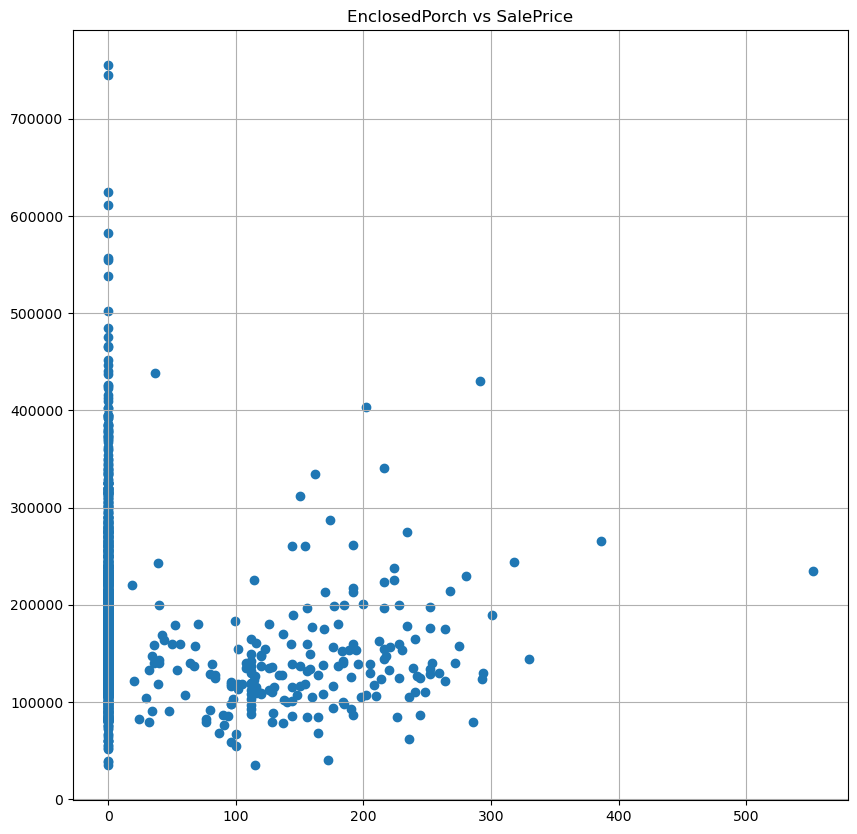

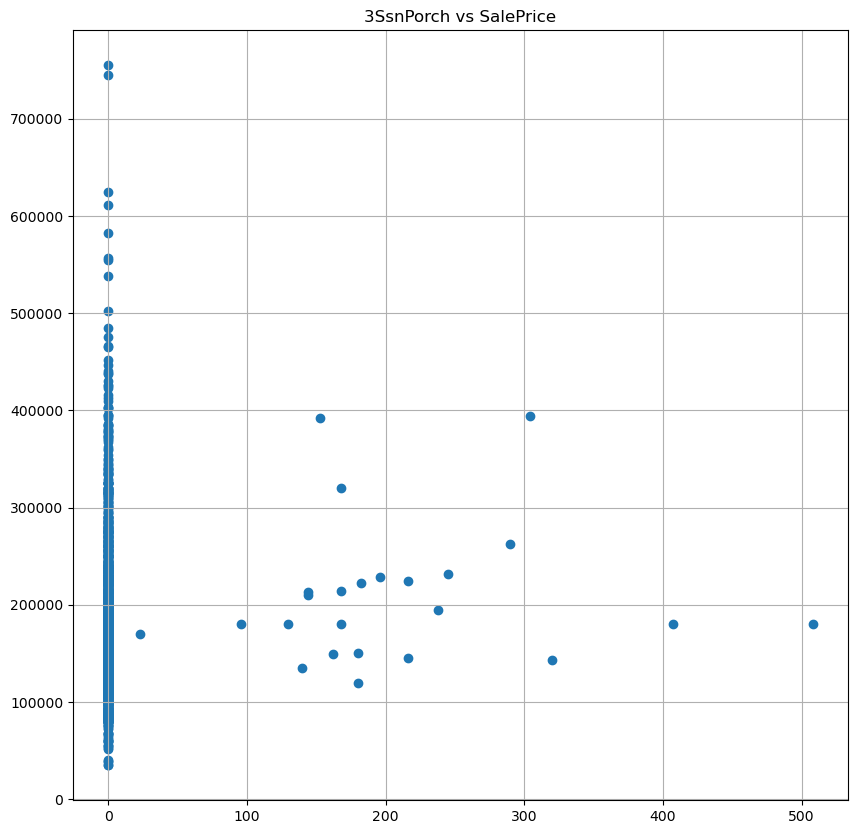

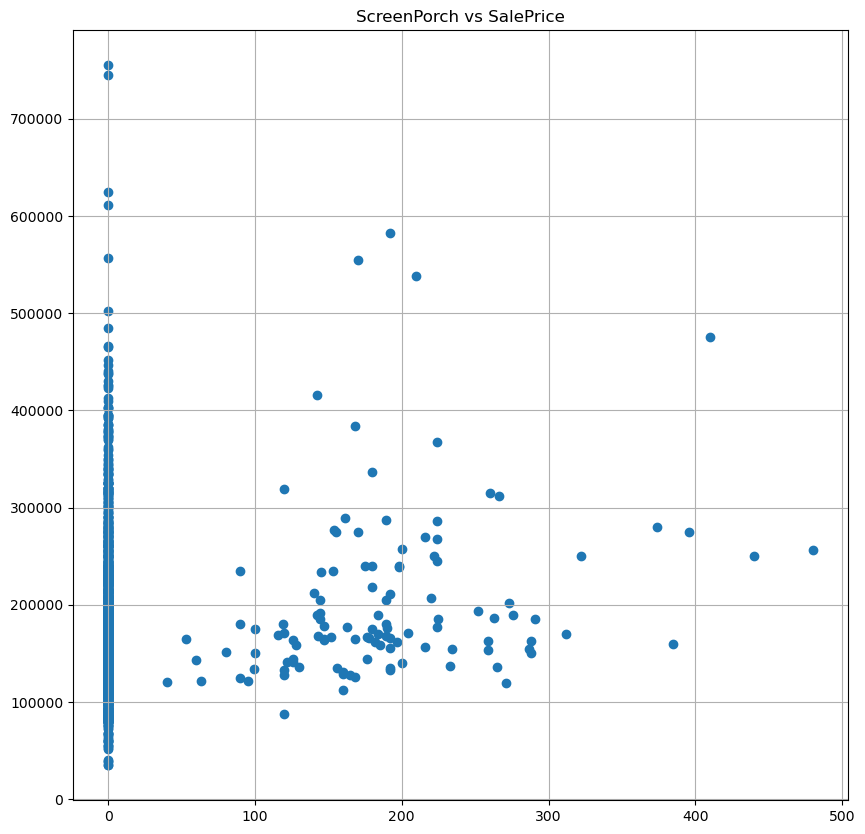

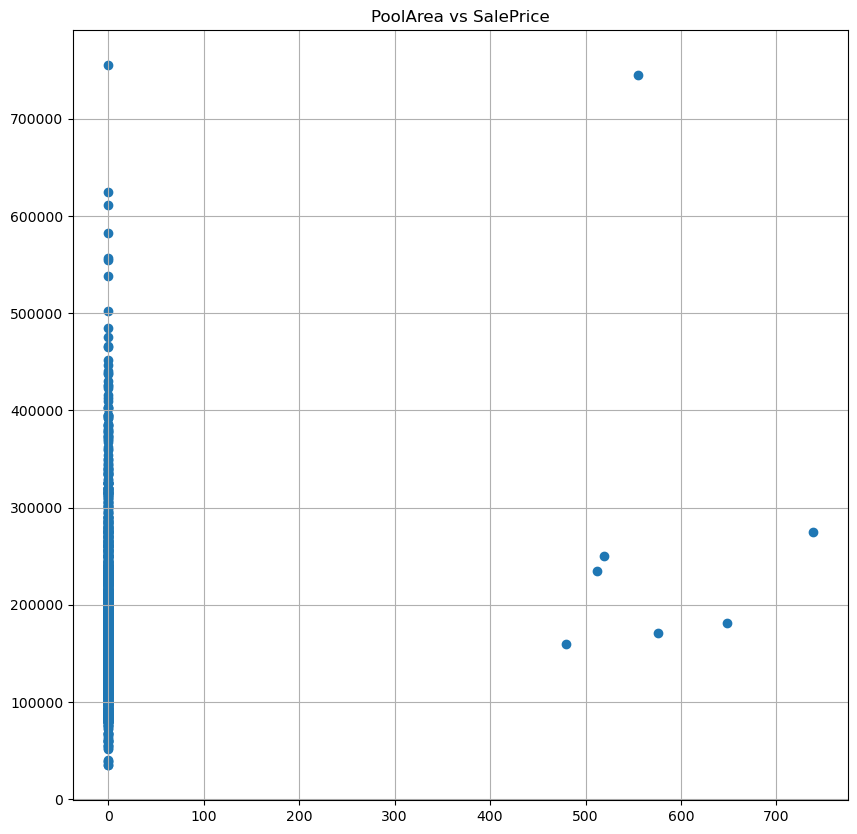

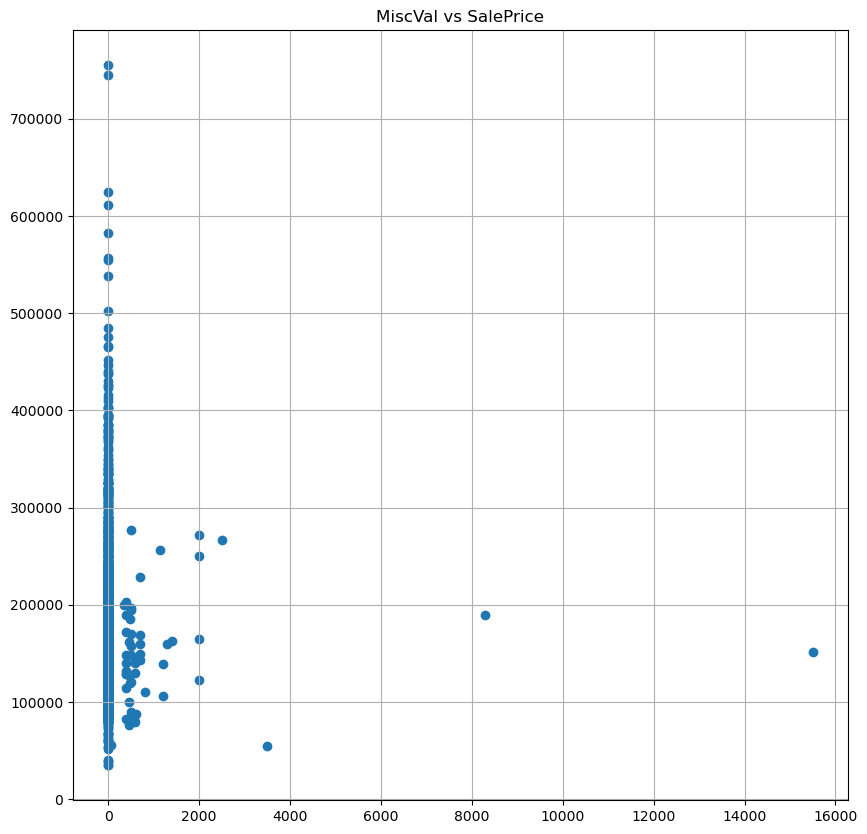

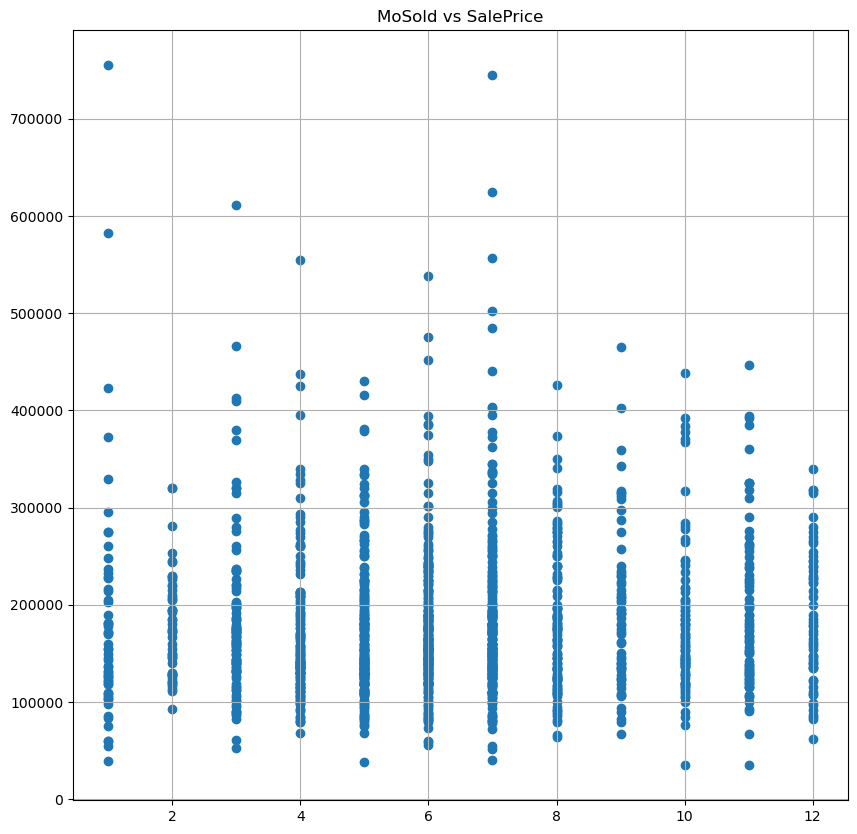

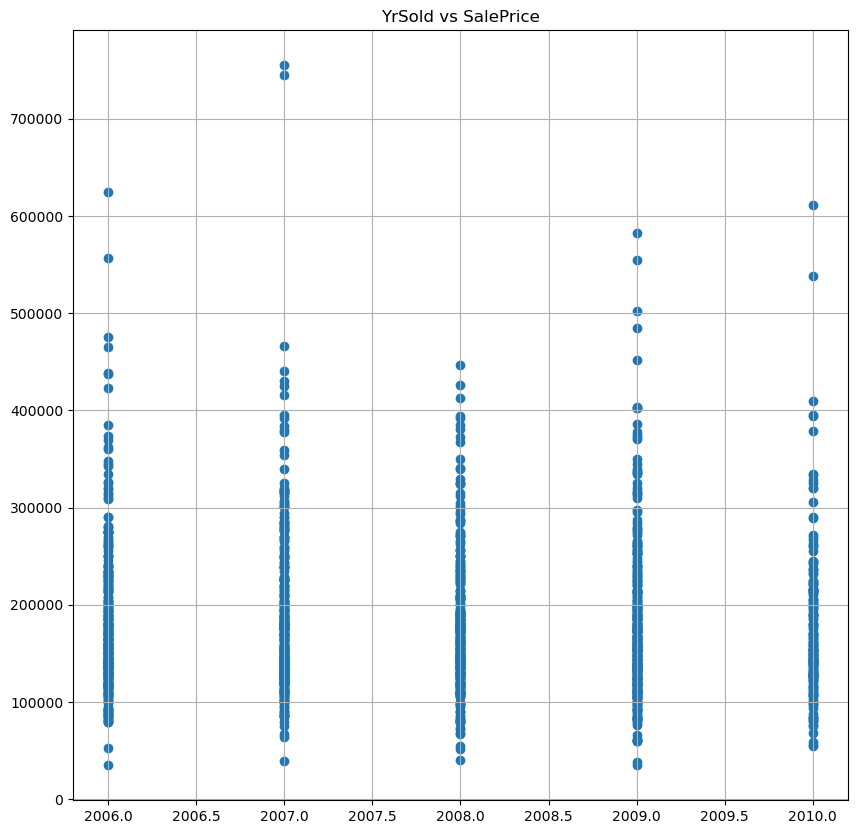

In [9]:
for col in num_cols:
    if col == 'SalePrice' or col == 'Id':
        continue
    plt.figure(figsize=(10,10))
    plt.scatter(x=train_df[col],y=train_df['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.grid(True)
    plt.show()

    

### Observation From above graphs

In [10]:
# MSSubClas and SalePrice
train_df.query('SalePrice >700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [11]:
## 'LotFrontage' and SalePrice
train_df.query('LotFrontage > 300')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [12]:
## LotArea and SalePrice
train_df.query('LotArea > 200000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [13]:
## OverallCond and SalePrice
train_df.query('OverallCond <3 and SalePrice > 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,2,2010,2010,Hip,CompShg,VinylSd,VinylSd,Stone,350.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1445,Unf,0,411,1856,GasA,Ex,Y,SBrkr,1856,0,0,1856,1,0,1,1,1,1,Ex,8,Typ,1,Ex,Attchd,2010.0,Fin,3,834,TA,TA,Y,113,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432


In [14]:
## MasVnrArea  And SalePrice
train_df.query('MasVnrArea > 1400')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


In [15]:
## BsmtFinSF1 and SalePrice
train_df.query('BsmtFinSF1 > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [16]:
## TotalBsmtSF and SalePrice
train_df.query('TotalBsmtSF > 6000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [17]:
## 1stFlrSF and SalePrice
train_df.query('`1stFlrSF` > 4000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [18]:
## LowQualFinSF and SalePrice
train_df.query('LowQualFinSF > 550')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [19]:
## GrLivArea and SalePrice
train_df.query('GrLivArea > 4500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [20]:
##  BsmtFullBath,  BsmtHalfBath  and SalePrice
train_df.query('BsmtFullBath >2')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200,Unf,0,0,1200,GasA,TA,Y,SBrkr,1200,0,0,1200,3,0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [21]:
train_df.query('BsmtHalfBath > 1')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1402,0,0,1402,0,2,0,2,2,1,Gd,7,Typ,1,Gd,Attchd,2006.0,Fin,3,648,TA,TA,Y,120,16,0,0,0,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,945,Unf,0,0,945,GasA,TA,Y,SBrkr,980,0,0,980,0,2,2,0,4,0,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [22]:
train_df.query('BedroomAbvGr > 7')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [23]:
train_df.query('KitchenAbvGr > 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,5,5,1898,1965,Hip,CompShg,AsbShng,AsbShng,NaN,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,849,849,GasA,TA,N,FuseA,1075,1063,0,2138,0,0,2,0,2,3,TA,11,Typ,0,NaN,Detchd,1910.0,Unf,2,360,Fa,Po,N,40,156,0,0,0,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


In [24]:
train_df.query('TotRmsAbvGrd > 13')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [25]:
train_df.query('GarageArea > 1200 and SalePrice < 100000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


In [26]:
train_df.query(' OpenPorchSF> 500 and SalePrice < 100000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


In [27]:
train_df.query('EnclosedPorch > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,NaN,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


In [28]:
train_df.query('`3SsnPorch` > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
205,206,20,RL,99.0,11851,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1424,1424,GasA,Ex,Y,SBrkr,1442,0,0,1442,0,0,2,0,3,1,TA,5,Typ,0,NaN,Attchd,1990.0,RFn,2,500,TA,TA,Y,0,34,0,508,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,180500


In [29]:
train_df.query('MiscVal > 14000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498,Unf,0,460,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1960.0,RFn,1,301,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500


In [30]:
## Outliers to be drop 
## 692,1183,935,1299,379,298,314,1299,1299,186,1299,524,1299,598,955,739,636,636,49,810,1062,496,198,206,347
outlier_ids = [49, 186, 198, 206, 298, 314, 347, 379, 496, 524, 598, 636, 692, 739, 810, 935, 955, 1062, 1183, 1299]

In [31]:
train_df = train_df[~train_df['Id'].isin(outlier_ids)]

In [32]:
# 4.Are there any missing values?
(train_df.isnull().sum()/len(train_df)*100).sort_values(ascending=False)

PoolQC           99.722222
MiscFeature      96.388889
Alley            93.819444
Fence            80.833333
MasVnrType       59.652778
FireplaceQu      47.291667
LotFrontage      17.916667
GarageQual        5.277778
GarageFinish      5.277778
GarageYrBlt       5.277778
GarageType        5.277778
GarageCond        5.277778
BsmtExposure      2.638889
BsmtFinType2      2.638889
BsmtFinType1      2.569444
BsmtQual          2.569444
BsmtCond          2.569444
MasVnrArea        0.555556
Electrical        0.069444
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
CentralAir        0.000000
GarageArea        0.000000
SalePrice         0.000000
Utilities         0.000000
L

In [33]:
test_df.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
FireplaceQu       730
LotFrontage       227
GarageFinish       78
GarageYrBlt        78
GarageCond         78
GarageQual         78
GarageType         76
BsmtCond           45
BsmtExposure       44
BsmtQual           44
BsmtFinType1       42
BsmtFinType2       42
MasVnrArea         15
MSZoning            4
Utilities           2
Functional          2
BsmtFullBath        2
BsmtHalfBath        2
SaleType            1
Exterior1st         1
KitchenQual         1
GarageCars          1
GarageArea          1
Exterior2nd         1
BsmtFinSF1          1
TotalBsmtSF         1
BsmtFinSF2          1
BsmtUnfSF           1
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
Id                  0
MSSubClass          0
LotArea             0
Street              0
LotShape            0
Heating   

### ploting categorical columns with saleprice to check their relation 

<Axes: xlabel='PoolQC', ylabel='SalePrice'>

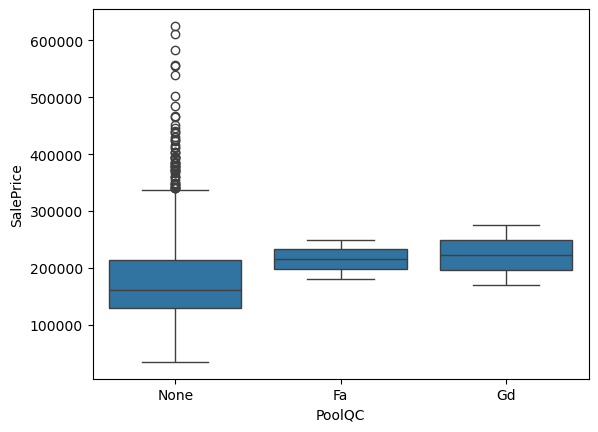

In [34]:
train_df['PoolQC']= train_df['PoolQC'].fillna('None')
test_df['PoolQC']= test_df['PoolQC'].fillna('None')

sns.boxplot(x=train_df['PoolQC'],y=train_df['SalePrice'])

<Axes: xlabel='MiscFeature', ylabel='SalePrice'>

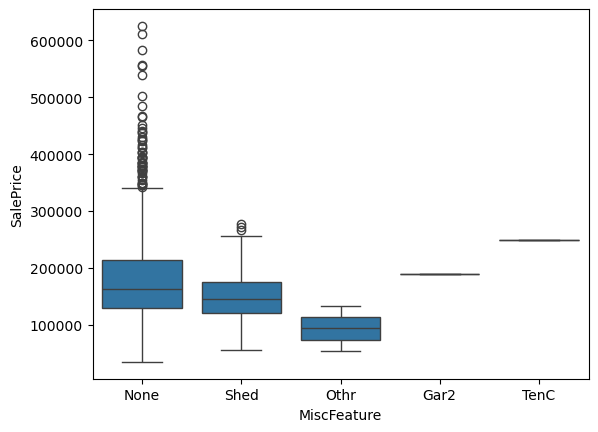

In [35]:
train_df['MiscFeature']= train_df['MiscFeature'].fillna('None')
test_df['MiscFeature']= test_df['MiscFeature'].fillna('None')

sns.boxplot(x=train_df['MiscFeature'],y=train_df['SalePrice'])

<Axes: xlabel='Alley', ylabel='SalePrice'>

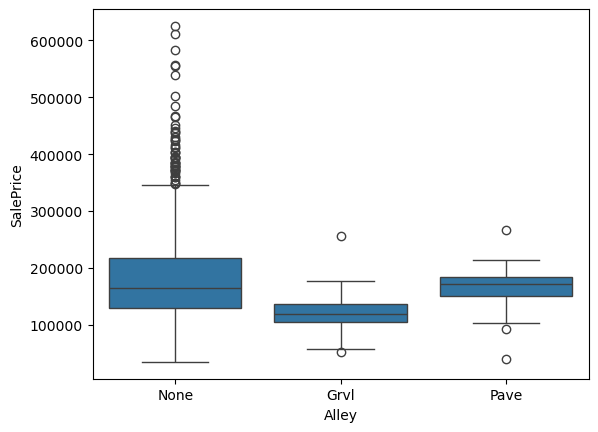

In [36]:
train_df['Alley']= train_df['Alley'].fillna('None')
test_df['Alley']= test_df['Alley'].fillna('None')

sns.boxplot(x=train_df['Alley'],y=train_df['SalePrice'])

<Axes: xlabel='Fence', ylabel='SalePrice'>

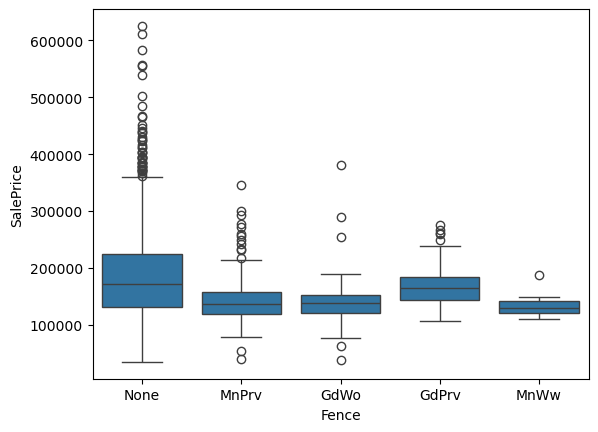

In [37]:
train_df['Fence']= train_df['Fence'].fillna('None')
test_df['Fence']= test_df['Fence'].fillna('None')

sns.boxplot(x=train_df['Fence'],y=train_df['SalePrice'])

<Axes: xlabel='MasVnrType', ylabel='SalePrice'>

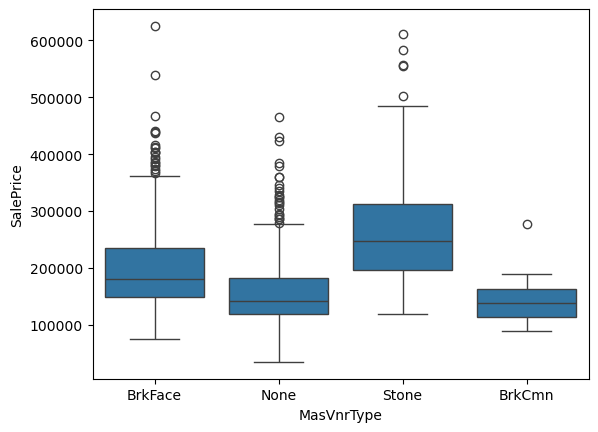

In [38]:

train_df['MasVnrType']= train_df['MasVnrType'].fillna('None')
test_df['MasVnrType']= test_df['MasVnrType'].fillna('None')

sns.boxplot(x=train_df['MasVnrType'],y=train_df['SalePrice'])

<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

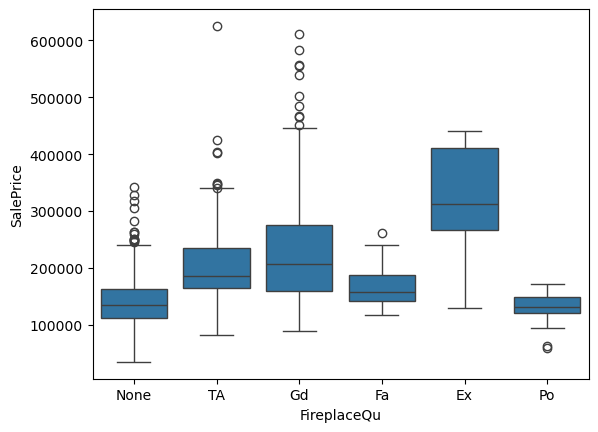

In [39]:
train_df['FireplaceQu']= train_df['FireplaceQu'].fillna('None')
test_df['FireplaceQu']= test_df['FireplaceQu'].fillna('None')

sns.boxplot(x=train_df['FireplaceQu'],y=train_df['SalePrice'])

### Filling missing columns

In [40]:
neighborhood_median = train_df.groupby('Neighborhood')['LotFrontage'].median()
overall_median = train_df['LotFrontage'].median()

In [41]:
train_df['LotFrontage'] = train_df.apply(
    lambda row: neighborhood_median[row['Neighborhood']] if pd.isnull(row['LotFrontage']) else row['LotFrontage'],
    axis=1
)
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(overall_median)

test_df['LotFrontage'] = test_df.apply(
    lambda row: neighborhood_median[row['Neighborhood']] if pd.isnull(row['LotFrontage']) else row['LotFrontage'],
    axis=1
)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(overall_median)


## Feature Engineering

In [42]:
print(num_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [43]:
train_df['totalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
test_df['totalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

In [44]:
train_df['totalBath'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5*( train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df['totalBath'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])

In [45]:
train_df['houseAge'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseAge'] = test_df['YrSold'] - test_df['YearBuilt']

In [46]:
train_df['remodelAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['remodelAge']= test_df['YrSold'] - test_df['YearRemodAdd']

In [47]:
train_df['garageAge'] = train_df['YrSold'] - train_df['GarageYrBlt']
test_df['garageAge'] = test_df['YrSold'] - test_df['GarageYrBlt']

### Droping irrelavant columns

In [48]:
## Columns to be drops

drop_cols = ['GarageYrBlt','YearRemodAdd','YearBuilt','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','TotalBsmtSF','1stFlrSF','2ndFlrSF','Fence','Alley','MiscFeature','PoolQC']

In [49]:
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

In [50]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,totalSF,totalBath,houseAge,remodelAge,garageAge
count,1440.000000,1440.000000,1440.000000,1440.00000,1440.000000,1440.000000,1432.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1364.000000
mean,732.377778,56.739583,69.576389,10281.45625,6.086111,5.578472,101.641760,436.162500,46.498611,566.863889,4.898611,1502.954861,2.862500,1.044444,6.494444,0.609722,1.766667,471.863889,94.603472,45.939583,21.725000,3.104167,14.847917,1.722917,32.940278,6.326389,2007.816667,179841.779861,2547.581250,2.201389,36.428472,23.019444,29.329912
std,422.217154,42.176021,20.039010,8279.83943,1.364017,1.106909,173.454057,429.346906,161.026839,441.875214,43.465395,490.035860,0.803387,0.206152,1.590004,0.639592,0.739814,209.588371,125.579271,64.064518,59.799788,26.348975,54.932378,32.940345,288.475212,2.695142,1.330040,76095.059472,755.594342,0.771089,30.089427,20.657124,24.653067
min,1.000000,20.000000,21.000000,1300.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000,334.000000,1.000000,0.000000,0.000000,0.000000
25%,367.750000,20.000000,60.000000,7526.25000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,0.000000,1128.000000,2.000000,1.000000,5.000000,0.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,2008.000000,2.000000,7.750000,4.000000,6.000000
50%,733.500000,50.000000,70.000000,9452.50000,6.000000,5.000000,0.000000,380.500000,0.000000,479.500000,0.000000,1458.500000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162900.000000,2469.000000,2.000000,35.000000,14.000000,28.000000
75%,1098.250000,70.000000,80.000000,11515.50000,7.000000,6.000000,165.250000,706.000000,0.000000,806.000000,0.000000,1768.750000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,2999.000000,2.500000,54.000000,41.000000,47.000000
max,1460.000000,190.000000,182.000000,164660.00000,10.000000,9.000000,1378.000000,2188.000000,1474.000000,2336.000000,528.000000,3627.000000,6.000000,2.000000,12.000000,3.000000,4.000000,1390.000000,857.000000,547.000000,386.000000,407.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,625000.000000,6428.000000,5.000000,136.000000,60.000000,107.000000


<Axes: >

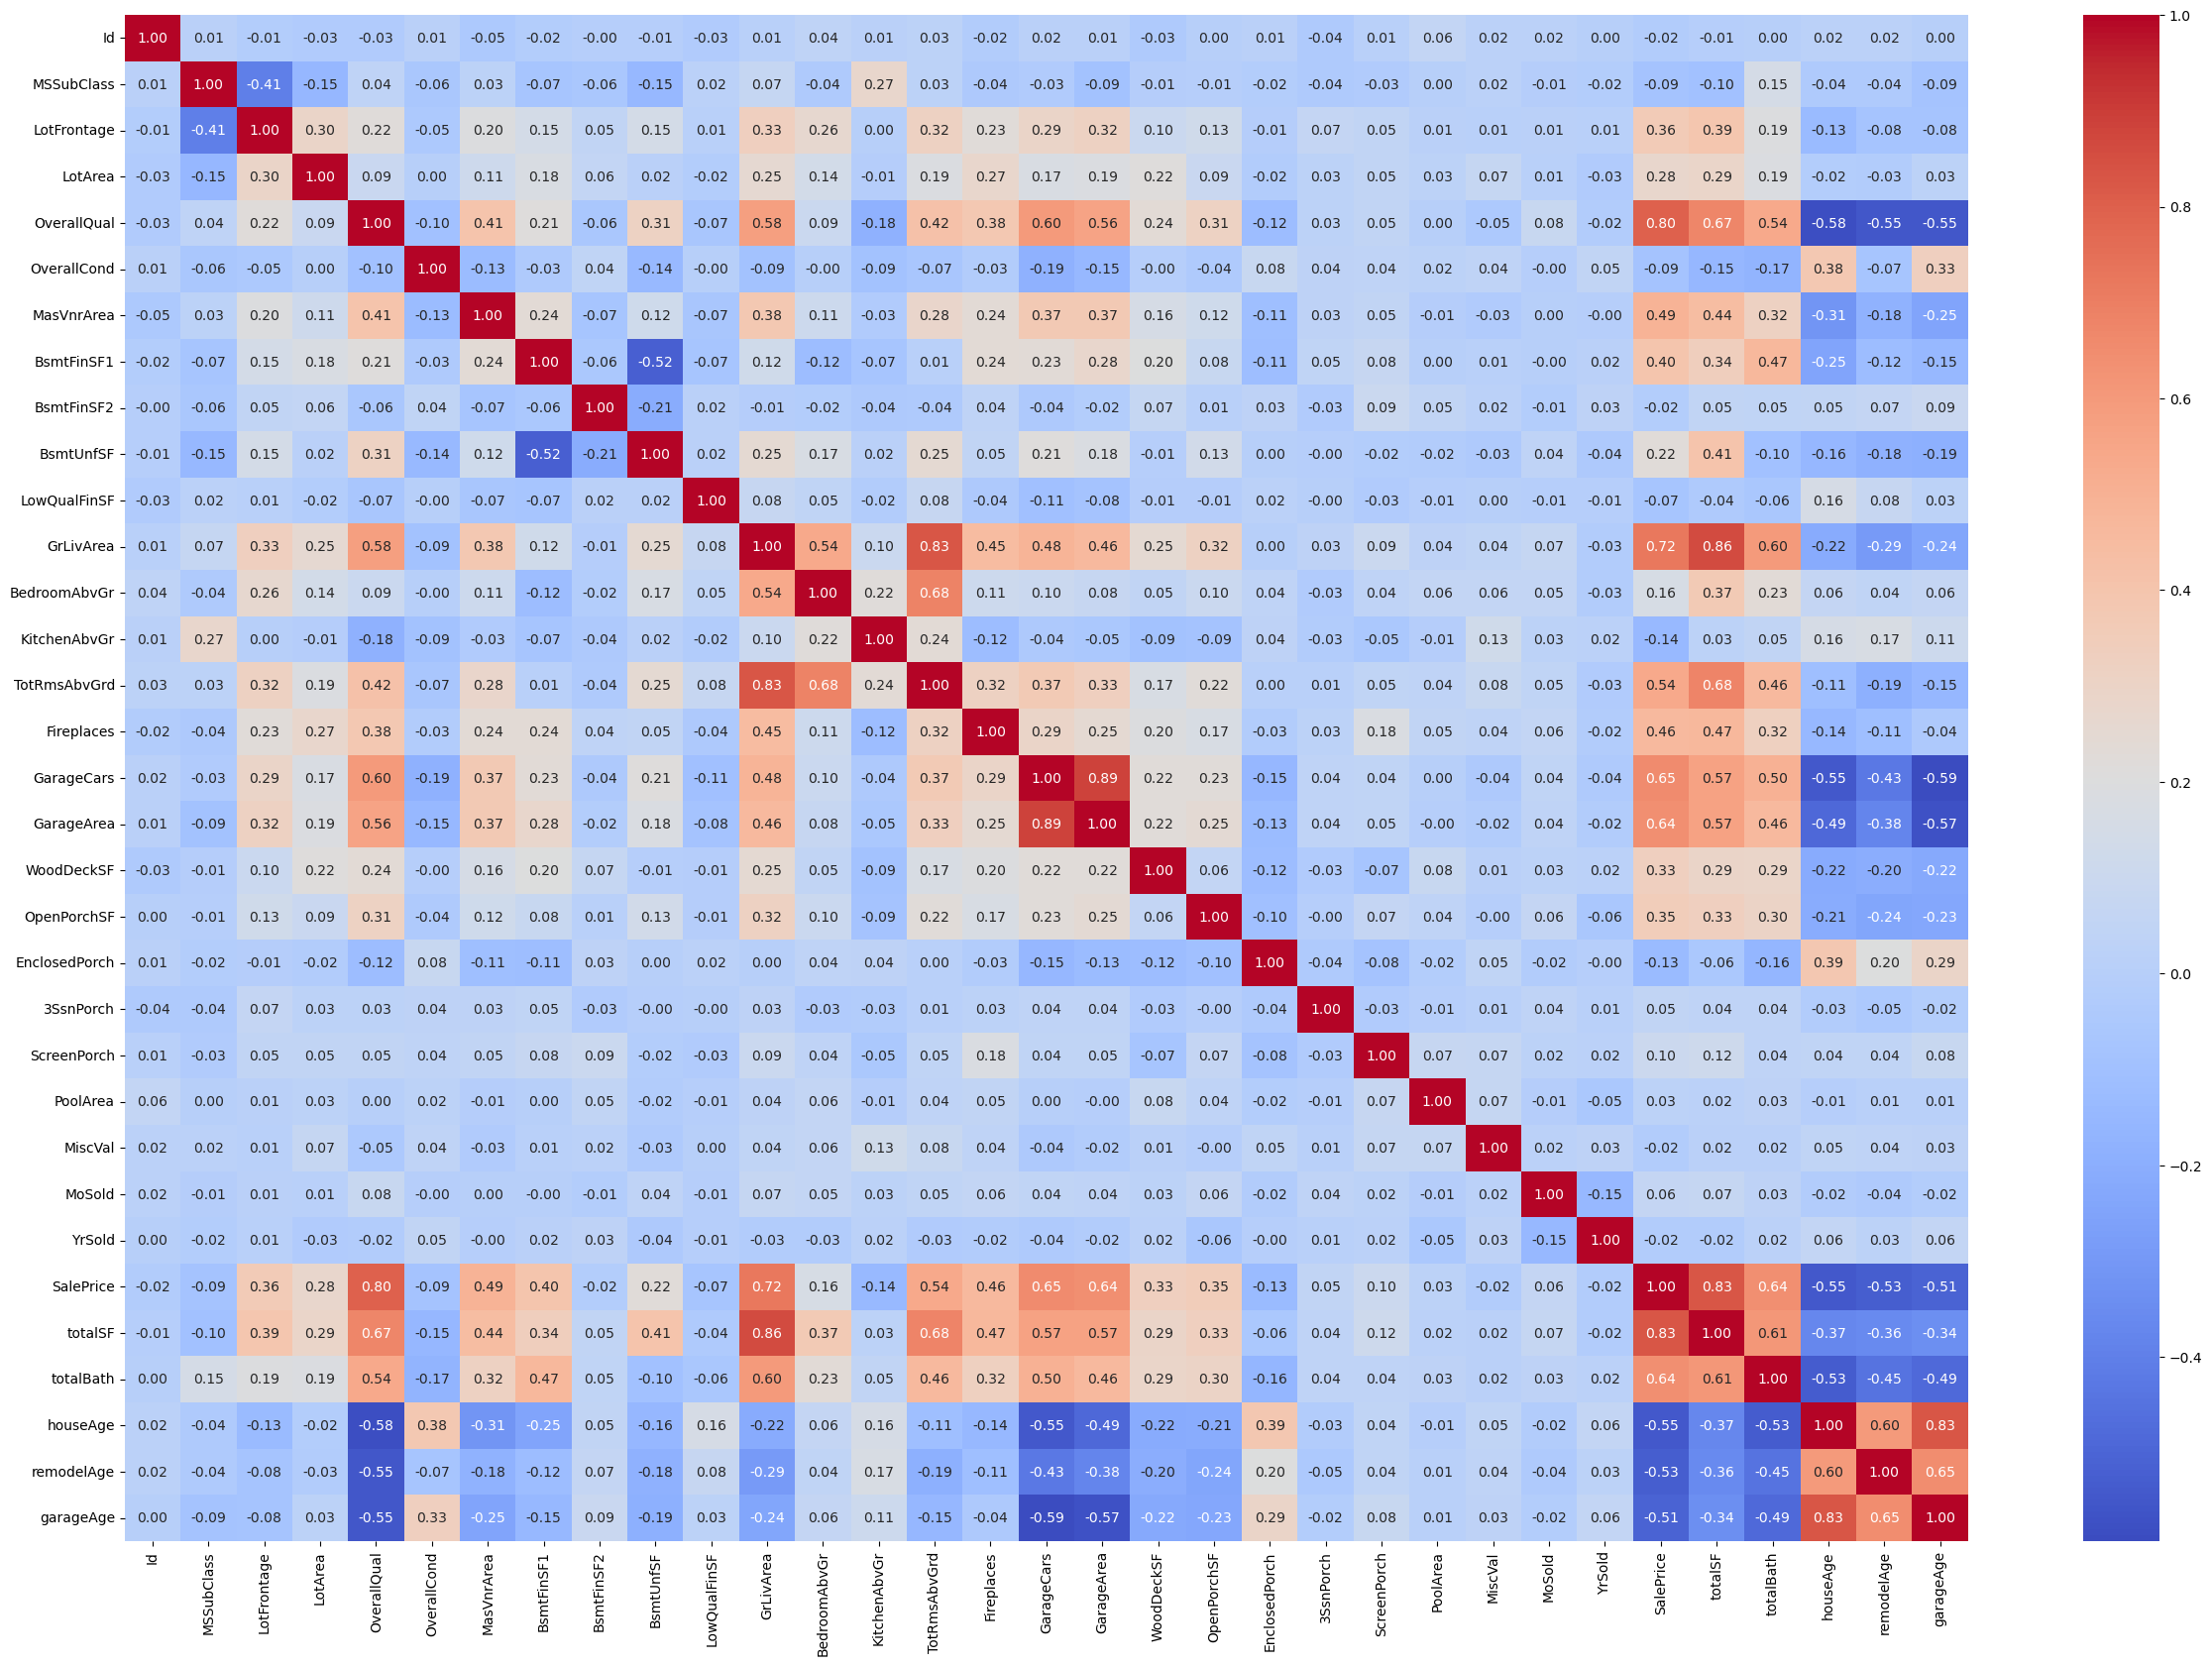

In [51]:
corr_matrix = (train_df.select_dtypes(include=('int64','float64'))).corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [52]:
## HouseAge and garageAge are strongly correlated 83%
## GrLivArea and totalSF are strongly correlated 83%
## GarageCar and GarageArea are strongly correlated 89%
## GrLivArea and TotRmsAbvGrd are strongly correlated 83%

In [53]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
totalSF          0.826199
OverallQual      0.799319
GrLivArea        0.722831
GarageCars       0.654436
GarageArea       0.644581
totalBath        0.642842
TotRmsAbvGrd     0.539079
MasVnrArea       0.493098
Fireplaces       0.460385
BsmtFinSF1       0.397001
LotFrontage      0.363927
OpenPorchSF      0.347640
WoodDeckSF       0.329097
LotArea          0.277153
BsmtUnfSF        0.224873
BedroomAbvGr     0.160555
ScreenPorch      0.101618
MoSold           0.063244
3SsnPorch        0.054255
PoolArea         0.028354
BsmtFinSF2      -0.017557
MiscVal         -0.020745
Id              -0.020948
YrSold          -0.022484
LowQualFinSF    -0.070582
OverallCond     -0.085560
MSSubClass      -0.087698
EnclosedPorch   -0.134882
KitchenAbvGr    -0.141253
garageAge       -0.505487
remodelAge      -0.525877
houseAge        -0.548254
Name: SalePrice, dtype: float64

In [54]:
reduce = ['GarageArea','garageAge']

In [55]:
train_df.drop(columns=reduce,inplace=True)
test_df.drop(columns=reduce,inplace=True)

In [56]:
cat_cols = train_df.select_dtypes(include=('object')).columns
print(cat_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [57]:
Y=train_df['SalePrice']
X=train_df.drop(columns=(['Id','SalePrice']))

### Checking Distribution of SalePrice

In [58]:
sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)
Y_sqrt = sqrt_transformer.fit_transform(train_df[['SalePrice']])

log_transformer = FunctionTransformer(np.log1p, validate=False)
Y_log = log_transformer.fit_transform(train_df[['SalePrice']])


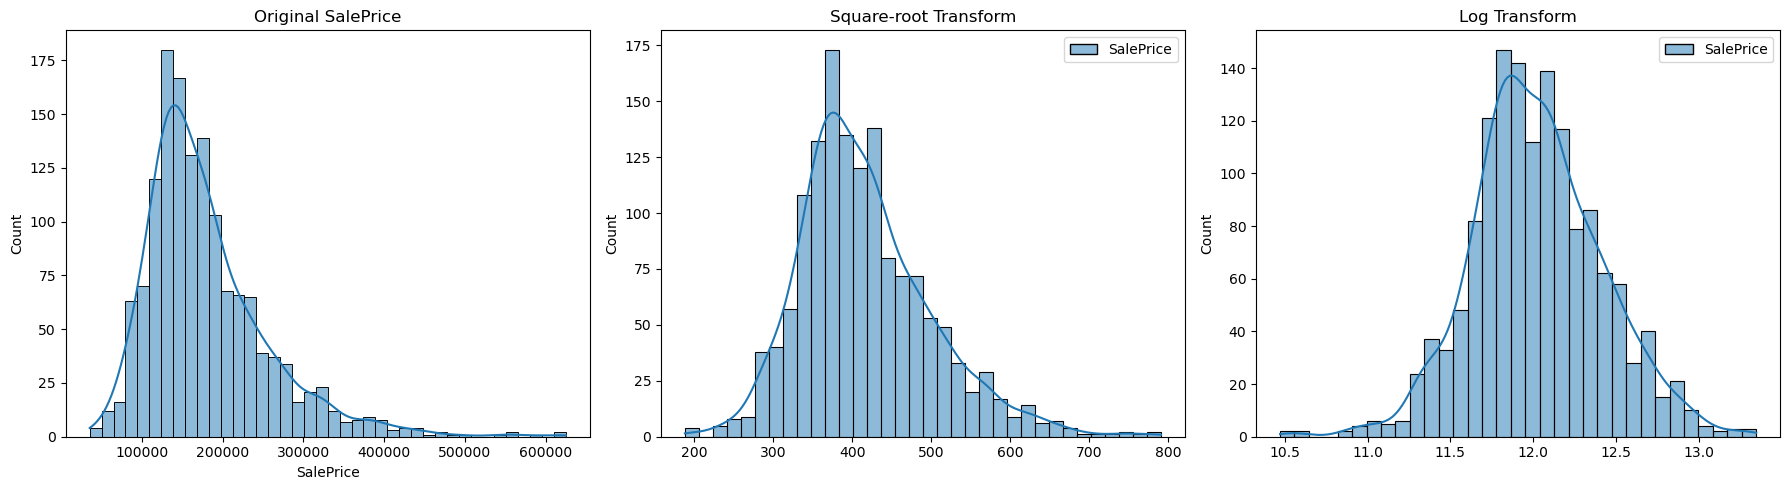

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(Y, kde=True, ax=axes[0])
axes[0].set_title('Original SalePrice')

sns.histplot(Y_sqrt, kde=True, ax=axes[1])
axes[1].set_title('Square-root Transform')

sns.histplot(Y_log, kde=True, ax=axes[2])
axes[2].set_title('Log Transform')

plt.tight_layout()
plt.show()

In [60]:
### so the Square_Root  Transformation look more normal distribution so i will use squre root
Y = Y_sqrt

### Different Types of columsn

In [61]:
ordinal_cols = ['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu', 'GarageFinish', 'GarageQual','GarageCond','PavedDrive']
nominal_cols = [ 'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1','Condition2', 'BldgType', 'HouseStyle', 'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating','CentralAir', 'Electrical', 'Functional', 'GarageType' , 'SaleType', 'SaleCondition']
numeric_cols = X.select_dtypes(include=('int64','float64'))
numeric_cols = numeric_cols.columns.tolist()

In [62]:
# custom mapping order for ordinal features
ordinal_categories = [
    ['IR3', 'IR2', 'IR1', 'Reg'],  # LotShape
    ['Sev', 'Mod', 'Gtl'],  # LandSlope
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterQual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # ExterCond
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtQual
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # BsmtCond
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],  # HeatingQC
    ['None','Po', 'Fa', 'TA', 'Gd', 'Ex'],  # KitchenQual
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # FireplaceQu
    ['None', 'Unf', 'RFn', 'Fin'],  # GarageFinish
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageQual
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  # GarageCond
    ['N', 'P', 'Y']  # PavedDrive
]

In [63]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [64]:
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('encoder', OrdinalEncoder(categories=ordinal_categories))
])


In [65]:
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


### Preprocessing 

In [66]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('ord', ordinal_transformer, ordinal_cols),
    ('nom', nominal_transformer, nominal_cols)
])


### Train test split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2, random_state=42)

## Linear Model

In [68]:
# Linear Model
from sklearn.linear_model import LinearRegression , Ridge,Lasso,ElasticNet

### 1.Linear Regression

In [69]:
# Linear Regression
LR = Pipeline(steps=[
    ('prep',preprocessor),
    ('Linear',LinearRegression())])

In [70]:
LR.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Firepl...
                                                                                 sparse_output=False))]),
                                                  ['MSZoning', 'Street',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'Foundation',
                                                   'Heating', 'CentralAir',
                                                   'Electrical', 'Functional',
                                                   'GarageType', 'SaleType',
                                                   'SaleCondition'])])),
                ('Linear', LinearRegression())])

In [71]:
LR.score(X_test,y_test)

-3.5719334960119327e+18

In [72]:
scores = cross_val_score(LR,X_train,y_train,cv=10,scoring='r2')

In [73]:
print(f'R2 Score {scores}')

R2 Score [ 8.79485528e-01 -3.86469316e+16 -4.45047785e+17  9.15556898e-01
 -3.60195203e+19 -7.65632985e+17 -1.24925362e+19  9.47837502e-01
 -3.02475572e+17  9.06746615e-01]


In [74]:
print(f'R2 means score {scores.mean()}')

R2 means score -5.006385977646393e+18


### 2.RidgeRegression

In [75]:
## Ridge Regression
ridge= Pipeline(steps=[
    ('prep',preprocessor),
    ('ridge',Ridge())])

In [76]:
param_grid={
    'ridge__alpha': [0.1,0.5,1,1.5,2,3,5,10],
    'ridge__solver':['auto', 'svd', 'cholesky', 'lsqr']
}

In [77]:
ridge_grid=GridSearchCV(ridge,param_grid,cv=10,n_jobs=-1,scoring='r2')

In [78]:
score = ridge_grid.fit(X_train,y_train)

In [79]:
print("Best parameters:", ridge_grid.best_params_)
print("Best R² score from GridSearchCV:", ridge_grid.best_score_)

Best parameters: {'ridge__alpha': 10, 'ridge__solver': 'svd'}
Best R² score from GridSearchCV: 0.9301387353750142


### 3.Lasso Regression

In [80]:
## Lasso Regression
lasso = Pipeline(steps=[
    ('prep',preprocessor),
    ('lasso',Lasso(max_iter=200000))
])

In [81]:
lasso_param_grid={
    'lasso__alpha':[0.1, 0.5, 1, 5, 10, 50, 100],
    'lasso__selection':['cyclic', 'random']
}

In [82]:
lasso_grid = GridSearchCV(lasso,lasso_param_grid,cv=10,n_jobs=-1,scoring='r2')

In [83]:
lasso_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'LowQualFinSF',
                                                                          'GrLivArea',
                                                                          'BedroomAbvGr',
                                                                          'Kitchen...
                                                                          'Condition2',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofStyle',
                                                                          'RoofMatl',
                                                                          'Exterior1st',
                                                                          'Exterior2nd',
                                                                          'MasVnrType',
                                                                          'Foundation',
                                                                          'Heating',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'Functional',
                                                                          'GarageType',
                                                                          'SaleType',
                                                                          'SaleCondition'])])),
                                       ('lasso', Lasso(max_iter=200000))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.1, 0.5, 1, 5, 10, 50, 100],
                         'lasso__selection': ['cyclic', 'random']},
             scoring='r2')

In [84]:
print(f'Best parametes : {lasso_grid.best_params_}')
print(f'Best R2 Score : {lasso_grid.best_score_}')

Best parametes : {'lasso__alpha': 0.1, 'lasso__selection': 'random'}
Best R2 Score : 0.9295058035354049


### 4.Elastic Net

In [85]:
## Elsatic Net

elastic = Pipeline(steps=[
    ('prep',preprocessor),
    ('elastic',ElasticNet(max_iter=200000))
])

In [86]:
elastic_param_grid = {
    'elastic__alpha':[0.5,1,5,10,15],
    'elastic__l1_ratio': [0.1, 0.4,0.5, 0.7, 0.9, 1.0]
}

In [87]:
elastic_grid=GridSearchCV(elastic,elastic_param_grid,cv=10,n_jobs=-1,scoring='r2')

In [88]:
elastic_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'LowQualFinSF',
                                                                          'GrLivArea',
                                                                          'BedroomAbvGr',
                                                                          'Kitchen...
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofStyle',
                                                                          'RoofMatl',
                                                                          'Exterior1st',
                                                                          'Exterior2nd',
                                                                          'MasVnrType',
                                                                          'Foundation',
                                                                          'Heating',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'Functional',
                                                                          'GarageType',
                                                                          'SaleType',
                                                                          'SaleCondition'])])),
                                       ('elastic',
                                        ElasticNet(max_iter=200000))]),
             n_jobs=-1,
             param_grid={'elastic__alpha': [0.5, 1, 5, 10, 15],
                         'elastic__l1_ratio': [0.1, 0.4, 0.5, 0.7, 0.9, 1.0]},
             scoring='r2')

In [89]:
print(f'Best parameters : {elastic_grid.best_params_}')
print(f'Best Score : {elastic_grid.best_score_}')

Best parameters : {'elastic__alpha': 0.5, 'elastic__l1_ratio': 1.0}
Best Score : 0.9207037300089531


In [90]:
y_poly = elastic_grid.predict(X_test)
print("Polynomial R² score:", r2_score(y_test,y_poly))
print("Polynomial  MSE:", mean_squared_error(y_test,y_poly))
print("Polynomial  MAE:", mean_absolute_error(y_test,y_poly)) 

Polynomial R² score: 0.8933871169284954
Polynomial  MSE: 803.6868795083587
Polynomial  MAE: 19.52377426709743


## Polynomial Regression

In [91]:
## Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [92]:
poly = Pipeline(steps=[
    ('prep',preprocessor),
    ('poly',PolynomialFeatures()),
    ('ridge',Ridge())
])

In [93]:
poly_param={
    'poly__degree':[1,2],
    'ridge__alpha':[1,5]
}

In [94]:
poly_grid=GridSearchCV(poly,poly_param,cv=10,n_jobs=-1,scoring='r2')

In [95]:
poly_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'LowQualFinSF',
                                                                          'GrLivArea',
                                                                          'BedroomAbvGr',
                                                                          'Kitchen...
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'Condition2',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofStyle',
                                                                          'RoofMatl',
                                                                          'Exterior1st',
                                                                          'Exterior2nd',
                                                                          'MasVnrType',
                                                                          'Foundation',
                                                                          'Heating',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'Functional',
                                                                          'GarageType',
                                                                          'SaleType',
                                                                          'SaleCondition'])])),
                                       ('poly', PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2], 'ridge__alpha': [1, 5]},
             scoring='r2')

In [96]:
print(f'Best params : {poly_grid.best_params_}')
print(f'Best score : {poly_grid.best_score_}')

Best params : {'poly__degree': 1, 'ridge__alpha': 5}
Best score : 0.929455858411908


In [97]:
y_poly = poly_grid.predict(X_test)
print("Polynomial R² score:", r2_score(y_test,y_poly))
print("Polynomial  MSE:", mean_squared_error(y_test,y_poly))
print("Polynomial  MAE:", mean_absolute_error(y_test,y_poly)) 

Polynomial R² score: 0.893985049607943
Polynomial  MSE: 799.1794444268119
Polynomial  MAE: 18.58397622777988


## Knn Regressor

In [98]:
### KNN Regrssor
from sklearn.neighbors import KNeighborsRegressor
knn = Pipeline(steps=[
    ('prep',preprocessor),
    ('knn',KNeighborsRegressor())
])

In [99]:
param_grid={
    'knn__n_neighbors':[1,2,3,4,5,6],
    'knn__weights':['uniform', 'distance'],
    'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [100]:
knn_grid=GridSearchCV(knn,param_grid,cv=10,n_jobs=-1,scoring='r2')

In [101]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'LowQualFinSF',
                                                                          'GrLivArea',
                                                                          'BedroomAbvGr',
                                                                          'Kitchen...
                                                                          'RoofMatl',
                                                                          'Exterior1st',
                                                                          'Exterior2nd',
                                                                          'MasVnrType',
                                                                          'Foundation',
                                                                          'Heating',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'Functional',
                                                                          'GarageType',
                                                                          'SaleType',
                                                                          'SaleCondition'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2')

In [102]:
print(f'Best param : {knn_grid.best_params_}')
print(f'Best Score : {knn_grid.best_score_}')

Best param : {'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best Score : 0.8375984561129874


In [103]:
y_knn = knn_grid.predict(X_test)
print("KNN R² score:", r2_score(y_test,y_knn))
print("KNN MSE:", mean_squared_error(y_test,y_knn))
print("KNN MAE:", mean_absolute_error(y_test,y_knn)) 

KNN R² score: 0.8284763852492895
KNN MSE: 1293.007699721772
KNN MAE: 24.371820861784542


## Decision Tree Regressor

In [104]:
## Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [105]:
decision_tree=Pipeline(steps=[
    ('prep',preprocessor),
    ('tree',DecisionTreeRegressor())
])

In [106]:
decision_param = {
    'tree__criterion': ['squared_error', 'absolute_error'], 
    'tree__splitter': ['best', 'random'],
    'tree__max_depth': [2, 3, 4, 5, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_features': [None, 'sqrt', 'log2'],
    'tree__ccp_alpha': [0.0, 0.01, 0.1]
}

In [107]:
decision_grid = GridSearchCV(decision_tree,decision_param,cv=10,n_jobs=-1,scoring='r2')

In [108]:
decision_grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print(f'Best param : {decision_grid.best_params_}')
print(f'Best Score : {decision_grid.best_score_}')

Best param : {'tree__ccp_alpha': 0.0, 'tree__criterion': 'absolute_error', 'tree__max_depth': None, 'tree__max_features': None, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 10, 'tree__splitter': 'random'}
Best Score : 0.8141289450750937


In [ ]:
y_tree = decision_grid.predict(X_test)
print("DecisionTree R² score:", r2_score(y_test,y_tree))
print("DecisionTree MSE:", mean_squared_error(y_test,y_tree))
print("DecisionTree MAE:", mean_absolute_error(y_test,y_tree)) 

DecisionTree R² score: 0.8037519928070304
DecisionTree MSE: 1479.3892066952974
DecisionTree MAE: 27.140169333144094


## RandomForestRegressor

In [ ]:
## RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randomForest = Pipeline(steps=[
    ('prep',preprocessor),
    ('random',RandomForestRegressor())
])

In [ ]:
random_param={
    'random__n_estimators': [100, 200],
    'random__max_depth': [10, 20, 30],
    'random__min_samples_split': [5, 10],
    'random__bootstrap': [True, False],
}

In [ ]:
random_grid=GridSearchCV(randomForest,random_param,cv=10,n_jobs=-1,scoring='r2')

In [ ]:
random_grid.fit(X_train,y_train)

/home/hamza/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hamza/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hamza/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/hamza/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'LowQualFinSF',
                                                                          'GrLivArea',
                                                                          'BedroomAbvGr',
                                                                          'Kitchen...
                                                                          'Exterior1st',
                                                                          'Exterior2nd',
                                                                          'MasVnrType',
                                                                          'Foundation',
                                                                          'Heating',
                                                                          'CentralAir',
                                                                          'Electrical',
                                                                          'Functional',
                                                                          'GarageType',
                                                                          'SaleType',
                                                                          'SaleCondition'])])),
                                       ('random', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'random__bootstrap': [True, False],
                         'random__max_depth': [10, 20, 30],
                         'random__min_samples_split': [5, 10],
                         'random__n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
print(f"Best param : {random_grid.best_params_}")
print(f"Best score : {random_grid.best_score_}")

Best param : {'random__bootstrap': True, 'random__max_depth': 30, 'random__min_samples_split': 5, 'random__n_estimators': 100}
Best score : 0.9015283672192096


In [ ]:
y_random = random_grid.predict(X_test)
print("RodomForest R² score:", r2_score(y_test, y_random))
print("RodomForest MSE:", mean_squared_error(y_test, y_random))
print("RodomForest MAE:", mean_absolute_error(y_test, y_random)) 

RodomForest R² score: 0.8735192211240258
RodomForest MSE: 953.4583397809599
RodomForest MAE: 20.562256271006063


## TEST DATA 

In [109]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,totalSF,totalBath,houseAge,remodelAge
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,GasA,TA,Y,SBrkr,0,896,2,1,TA,5,Typ,0,None,Attchd,Unf,1.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,1778.0,1.0,49,49
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,GasA,TA,Y,SBrkr,0,1329,3,1,Gd,6,Typ,0,None,Attchd,Unf,1.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,2658.0,1.5,52,52
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,GasA,Gd,Y,SBrkr,0,1629,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,2557.0,2.5,13,12
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,GasA,Ex,Y,SBrkr,0,1604,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,2530.0,2.5,12,12
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,GasA,Ex,Y,SBrkr,0,1280,2,1,Gd,5,Typ,0,None,Attchd,RFn,2.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,2560.0,2.0,18,18


In [110]:
y_pred_sqrt = ridge_grid.best_estimator_.predict(test_df.drop(columns=(['Id'])))

In [111]:
print(test_df['Id'].shape)   
print(y_pred_sqrt.shape)           

(1459,)
(1459, 1)


In [112]:
y_pred_sqrt = y_pred_sqrt.reshape(-1)

In [113]:
y_pred = y_pred_sqrt ** 2 

In [114]:
submission = pd.DataFrame({"Id": test_df["Id"], "SalePrice": y_pred})
submission.to_csv('submission.csv', index=False)

## Pickle

In [115]:
import pickle

In [116]:
with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_grid.best_estimator_, f)

In [117]:
with open('ridge_model.pkl', 'rb') as f:
   loaded_model = pickle.load(f)

In [137]:
col_types = train_df.drop(columns=['SalePrice','Id']).dtypes.apply(lambda x:str(x)).to_dict()
col_types

{'MSSubClass': 'int64',
 'MSZoning': 'object',
 'LotFrontage': 'float64',
 'LotArea': 'int64',
 'Street': 'object',
 'LotShape': 'object',
 'LandContour': 'object',
 'Utilities': 'object',
 'LotConfig': 'object',
 'LandSlope': 'object',
 'Neighborhood': 'object',
 'Condition1': 'object',
 'Condition2': 'object',
 'BldgType': 'object',
 'HouseStyle': 'object',
 'OverallQual': 'int64',
 'OverallCond': 'int64',
 'RoofStyle': 'object',
 'RoofMatl': 'object',
 'Exterior1st': 'object',
 'Exterior2nd': 'object',
 'MasVnrType': 'object',
 'MasVnrArea': 'float64',
 'ExterQual': 'object',
 'ExterCond': 'object',
 'Foundation': 'object',
 'BsmtQual': 'object',
 'BsmtCond': 'object',
 'BsmtExposure': 'object',
 'BsmtFinType1': 'object',
 'BsmtFinSF1': 'int64',
 'BsmtFinType2': 'object',
 'BsmtFinSF2': 'int64',
 'BsmtUnfSF': 'int64',
 'Heating': 'object',
 'HeatingQC': 'object',
 'CentralAir': 'object',
 'Electrical': 'object',
 'LowQualFinSF': 'int64',
 'GrLivArea': 'int64',
 'BedroomAbvGr': 'int6

In [138]:
with open('col_types.pkl', 'wb') as f:
    pickle.dump(col_types, f)

In [139]:
categories = {}
for col, dtype in col_types.items():
    if dtype == 'object':
        categories[col] = list(X[col].unique())

In [140]:
with open('categories.pkl', 'wb') as f:
    pickle.dump(categories, f)

In [118]:
row=X_train.iloc[[0]]

In [119]:
row.shape

(1, 68)

In [120]:
pred = loaded_model.predict(row)

In [121]:
pred

array([[485.64603258]])

In [122]:
y_train.iloc[0]

SalePrice    495.328174
Name: 1166, dtype: float64

In [136]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,totalSF,totalBath,houseAge,remodelAge
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,2566,3.5,5,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,2524,2.5,31,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,2706,3.5,7,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,2473,2.0,91,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3343,3.5,8,8
